In [51]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import missingno as msno
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler



In [52]:
df = pd.read_excel('Open_DATA_Import Janar-Dhjetor-2024.xlsx', sheet_name='IMPORT_1')
df.head()

,VITI,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
0,2024,1,IM4,CN - KINA,8807100090 - Helikat dhe rotorët dhe pjesët e ...,NaN,786.21,1.00,78.62,0.0,155.67
1,2024,1,IM4,PL - POLONIA,8529101190 - Antenat teleskopike dhe të tipit ...,NaN,20.18,0.60,2.02,0.0,4.00
2,2024,1,IM4,CN - KINA,8806229090 - Me peshën maksimale të ngritjes m...,NaN,23763.00,34.24,2376.30,0.0,4705.08
3,2024,1,IM4,BG - BULLGARIA,8413703090 - Pompat forcuese glandless për sis...,20.0,4896.05,295.00,0.00,0.0,0.00
4,2024,1,IM4,DE - GJERMANIA,"9405618090 - Shenjat e ndriçimit, tabelat e nd...",NaN,3208.12,126.00,0.00,0.0,577.46


# Dataset Description

| **Column**         | **Description**                                                                 |
|---------------------|---------------------------------------------------------------------------------|
| **VITI**           | Year of the transaction.                                                        |
| **MUAJI**          | Month of the transaction.                                                       |
| **Regjimi**        | Customs regime applied to the transaction.                                      |
| **Origjina**       | Country or region of origin of the goods.                                       |
| **Kodi Tarifor**   | Tariff code (HS code) classifying the goods.                                    |
| **Sasia**          | Quantity of goods traded.                                                       |
| **Vlera Mallrave** | Monetary value of the goods.                                                    |
| **Netweight**      | Net weight of the goods (excluding packaging).                                  |
| **Taksa Doganës**  | Customs duty applied to the goods.                                              |
| **Taksa Akcizës**  | Excise duty applied to specific goods (e.g., alcohol, tobacco).                 |
| **Taksa TVSH-së**  | Value Added Tax (VAT) applied to the goods.                                     |

# Data inspect

In [53]:
print(df.info)

<bound method DataFrame.info of         VITI  MUAJI Regjimi        Origjina  \
0       2024      1     IM4       CN - KINA   
1       2024      1     IM4    PL - POLONIA   
2       2024      1     IM4       CN - KINA   
3       2024      1     IM4  BG - BULLGARIA   
4       2024      1     IM4  DE - GJERMANIA   
...      ...    ...     ...             ...   
233633  2024     12     IM4  DE - GJERMANIA   
233634  2024     12     IM4      IN - INDIA   
233635  2024     12     IM4     IT - ITALIA   
233636  2024     12     IM4       CN - KINA   
233637  2024     12     IM4    PL - POLONIA   

                                             Kodi Tarifor  Sasia  \
0       8807100090 - Helikat dhe rotorët dhe pjesët e ...    NaN   
1       8529101190 - Antenat teleskopike dhe të tipit ...    NaN   
2       8806229090 - Me peshën maksimale të ngritjes m...    NaN   
3       8413703090 - Pompat forcuese glandless për sis...   20.0   
4       9405618090 - Shenjat e ndriçimit, tabelat e nd...    Na

The dataset contains **233,638 entries (rows)** and **11 columns**.
The columns are of different data types:
- **Integer (int64):** `VITI`, `MUAJI`
- **Float (float64):** `Sasia`, `Vlera Mallrave`, `Netweight`, `Taksa Doganës`, `Taksa Akcizës`, `Taksa TVSH-së`
- **Object (string/categorical):** `Regjimi`, `Origjina`, `Kodi Tarifor`



In [54]:
df.describe()

,VITI,MUAJI,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
count,233638.0,233638.000000,7.294300e+04,2.336380e+05,2.336380e+05,2.336380e+05,2.336380e+05,2.336380e+05
mean,2024.0,6.634961,2.797952e+04,2.708681e+04,2.332468e+04,7.196629e+02,2.621695e+03,4.395679e+03
std,0.0,3.438751,6.357634e+05,2.529220e+05,4.405324e+05,9.445219e+03,1.291118e+05,6.060343e+04
min,2024.0,1.000000,1.000000e-02,0.000000e+00,5.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024.0,4.000000,4.065000e+00,2.425000e+02,1.000000e+01,0.000000e+00,0.000000e+00,2.798000e+01
50%,2024.0,7.000000,4.100000e+01,1.564370e+03,1.320000e+02,5.890000e+00,0.000000e+00,2.019600e+02
75%,2024.0,10.000000,5.939200e+02,9.675280e+03,1.782898e+03,9.960750e+01,0.000000e+00,1.306477e+03
max,2024.0,12.000000,6.315474e+07,3.772116e+07,5.145773e+07,1.015553e+06,2.256510e+07,1.084940e+07


#### **Count:**
- All columns (`VITI`, `MUAJI`, `Sasia`, `Vlera Mallrave`, `Netweight`, `Taksa Doganës`, `Taksa Akcizës`, `Taksa TVSH-së`) have **233,638 non-null entries**, except for `Sasia`, which has **72,943 non-null entries**. This indicates that the `Sasia` column has a significant number of missing values.

---

#### **Mean:**
- **`VITI`:** The mean value is **2024.0**, indicating that all transactions occurred in the year 2024.
- **`MUAJI`:** The mean value is **6.63**, suggesting that the average month of transactions is around June/July.
- **`Sasia`:** The mean quantity of goods traded is **27,979.52**, indicating a large volume of goods on average.
- **`Vlera Mallrave`:** The mean value of goods is **27,086.81**, showing a high average monetary value per transaction.
- **`Netweight`:** The mean net weight of goods is **23,324.68**, indicating heavy shipments on average.
- **`Taksa Doganës`:** The mean customs duty is **719.66**, suggesting moderate tax rates on average.
- **`Taksa Akcizës`:** The mean excise duty is **2,621.70**, indicating higher taxes on specific goods (e.g., alcohol, tobacco).
- **`Taksa TVSH-së`:** The mean VAT is **4,395.68**, showing a significant tax burden on goods.

---

#### **Standard Deviation (std):**
- **`VITI`:** The standard deviation is **0.0**, confirming that all transactions occurred in the same year (2024).
- **`MUAJI`:** The standard deviation is **3.44**, indicating moderate variability in the month of transactions.
- **`Sasia`:** The standard deviation is **635,763.40**, showing extremely high variability in the quantity of goods traded.
- **`Vlera Mallrave`:** The standard deviation is **252,921.97**, indicating high variability in the value of goods.
- **`Netweight`:** The standard deviation is **440,532.40**, showing extremely high variability in the net weight of goods.
- **`Taksa Doganës`:** The standard deviation is **9,445.22**, indicating significant variability in customs duties.
- **`Taksa Akcizës`:** The standard deviation is **129,111.77**, showing extremely high variability in excise duties.
- **`Taksa TVSH-së`:** The standard deviation is **60,603.43**, indicating significant variability in VAT.

---

#### **Minimum (min):**
- **`VITI`:** The minimum value is **2024**, confirming that all transactions occurred in 2024.
- **`MUAJI`:** The minimum value is **1**, indicating transactions occurred as early as January.
- **`Sasia`:** The minimum quantity of goods traded is **0.01**, showing very small transactions.
- **`Vlera Mallrave`:** The minimum value of goods is **0.0**, indicating some transactions have no monetary value.
- **`Netweight`:** The minimum net weight is **0.005**, showing very light shipments.
- **`Taksa Doganës`:** The minimum customs duty is **0.0**, indicating some transactions are duty-free.
- **`Taksa Akcizës`:** The minimum excise duty is **0.0**, indicating some goods are exempt from excise tax.
- **`Taksa TVSH-së`:** The minimum VAT is **0.0**, indicating some transactions are VAT-free.

---

#### **Quartiles (25%, 50%, 75%):**
- **`MUAJI`:**
  - 25% of transactions occurred by **April**, 50% by **July**, and 75% by **October**.
- **`Sasia`:**
  - 25% of transactions involve **4.06** units, 50% involve **41.0** units, and 75% involve **593.92** units.
- **`Vlera Mallrave`:**
  - 25% of transactions have a value of **242.5**, 50% have **1,564.37**, and 75% have **9,675.28**.
- **`Netweight`:**
  - 25% of shipments weigh **10.0**, 50% weigh **132.0**, and 75% weigh **1,782.90**.
- **`Taksa Doganës`:**
  - 25% of transactions have **0.0** customs duty, 50% have **5.89**, and 75% have **99.61**.
- **`Taksa Akcizës`:**
  - 25% of transactions have **0.0** excise duty, 50% have **0.0**, and 75% have **0.0**, indicating that most transactions are exempt from excise tax.
- **`Taksa TVSH-së`:**
  - 25% of transactions have **27.98** VAT, 50% have **201.96**, and 75% have **1,306.48**.

---

#### **Maximum (max):**
- **`VITI`:** The maximum value is **2024**, confirming all transactions occurred in 2024.
- **`MUAJI`:** The maximum value is **12**, indicating transactions occurred as late as December.
- **`Sasia`:** The maximum quantity of goods traded is **63,154,738.5**, indicating extremely large transactions.
- **`Vlera Mallrave`:** The maximum value of goods is **37,721,159.11**, indicating extremely high-value transactions.
- **`Netweight`:** The maximum net weight is **51,457,733.0**, indicating extremely heavy shipments.
- **`Taksa Doganës`:** The maximum customs duty is **1,015,552.62**, indicating very high tax rates for some transactions.
- **`Taksa Akcizës`:** The maximum excise duty is **22,565,098.44**, indicating extremely high taxes on specific goods.
- **`Taksa TVSH-së`:** The maximum VAT is **10,849,397.86**, indicating very high VAT for some transactions.

In [55]:
df.shape

(233638, 11)

- **Number of Rows (Observations)**: 233,638
- **Number of Columns (Features)**: 11

In [56]:
print(df.describe().T)

                   count          mean            std       min       25%  \
VITI            233638.0   2024.000000       0.000000  2024.000  2024.000   
MUAJI           233638.0      6.634961       3.438751     1.000     4.000   
Sasia            72943.0  27979.524529  635763.398873     0.010     4.065   
Vlera Mallrave  233638.0  27086.812414  252921.972771     0.000   242.500   
Netweight       233638.0  23324.680984  440532.397847     0.005    10.000   
Taksa Doganës   233638.0    719.662944    9445.218869     0.000     0.000   
Taksa Akcizës   233638.0   2621.695037  129111.766048     0.000     0.000   
Taksa TVSH-së   233638.0   4395.678829   60603.433861     0.000    27.980   

                    50%         75%          max  
VITI            2024.00  2024.00000      2024.00  
MUAJI              7.00    10.00000        12.00  
Sasia             41.00   593.92000  63154738.50  
Vlera Mallrave  1564.37  9675.28029  37721159.11  
Netweight        132.00  1782.89750  51457733.00  


In [57]:
df.describe(include=['O'])


,Regjimi,Origjina,Kodi Tarifor
count,233638,233638,233638
unique,1,194,6699
top,IM4,CN - KINA,3926909790 - Artikuj te tjere prej plastike
freq,233638,27784,595


In [58]:
duplicated=df.duplicated().sum()
print((duplicated/len(df))*100 , '%')

0.0 %


- **Number of Duplicated Rows**: `0`
- **Percentage of Duplicated Rows**: `0.0%`

In [59]:
# Check missing values in numerical columns
numerical_missing = df.select_dtypes(include=['number']).isnull().sum()
print(numerical_missing)

VITI                   0
MUAJI                  0
Sasia             160695
Vlera Mallrave         0
Netweight              0
Taksa Doganës          0
Taksa Akcizës          0
Taksa TVSH-së          0
dtype: int64


In [60]:
# Check missing values in categorical columns
categorical_missing = df.select_dtypes(include=['object', 'category']).isnull().sum()
print(categorical_missing)

Regjimi         0
Origjina        0
Kodi Tarifor    0
dtype: int64


<Axes: >

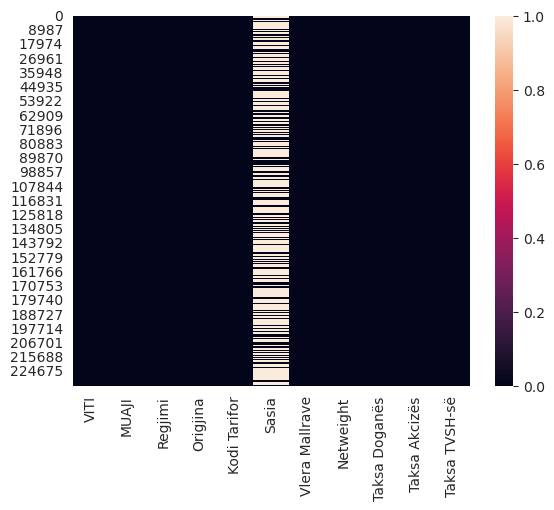

In [61]:
sns.heatmap(df.isnull())


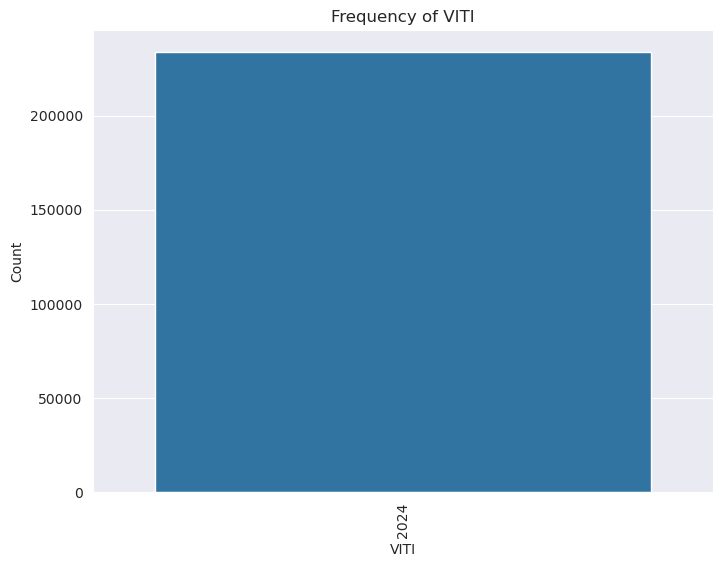

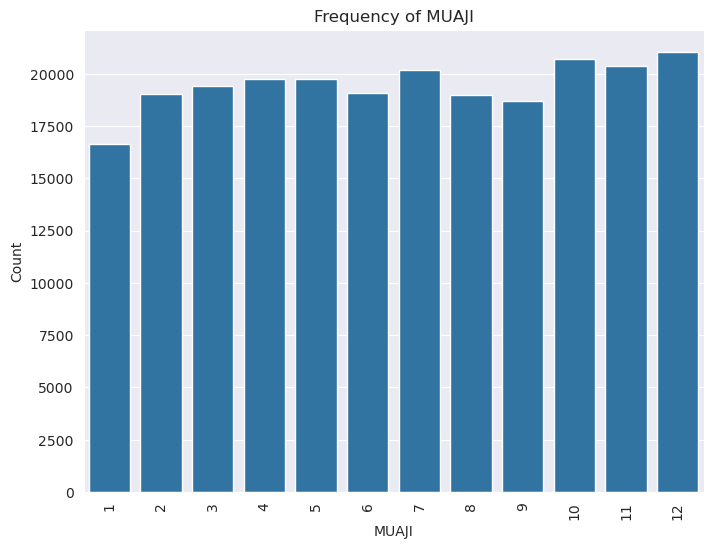

In [62]:
integer_columns = ['VITI', 'MUAJI']
for column in integer_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

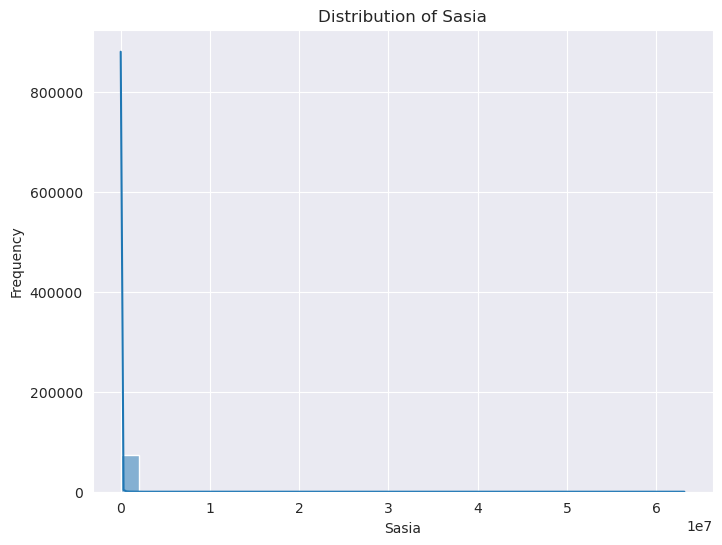

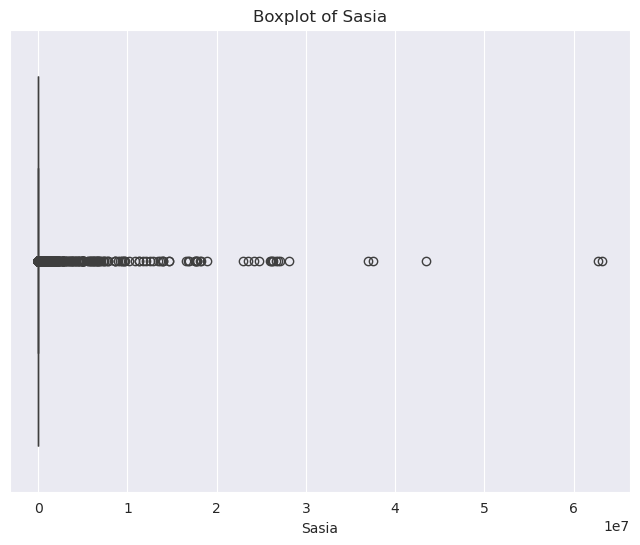

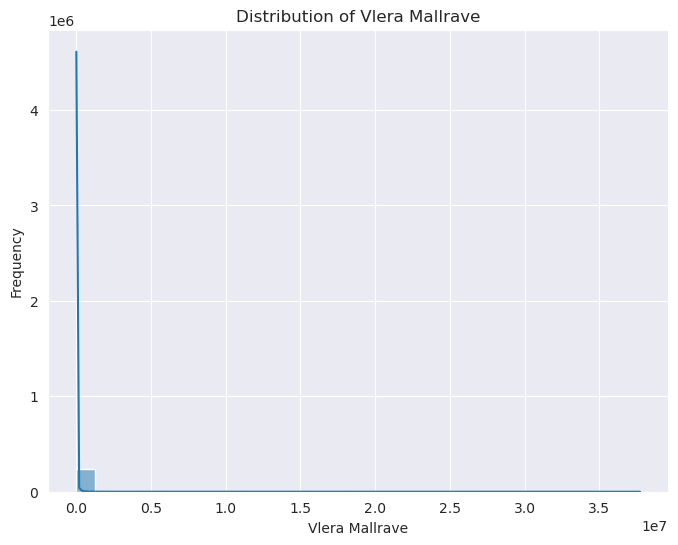

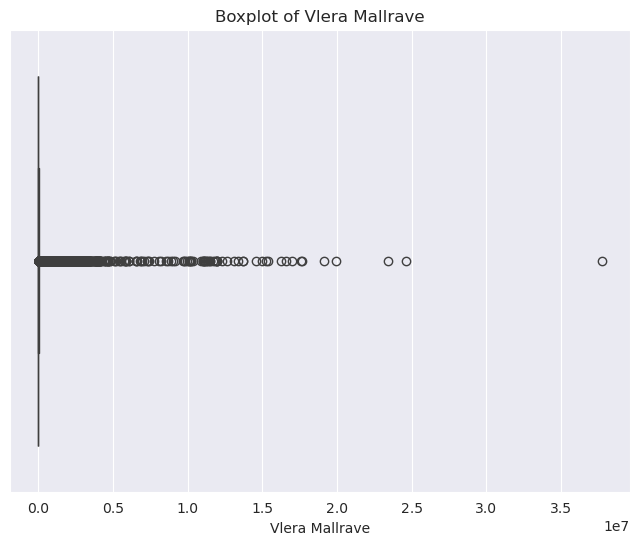

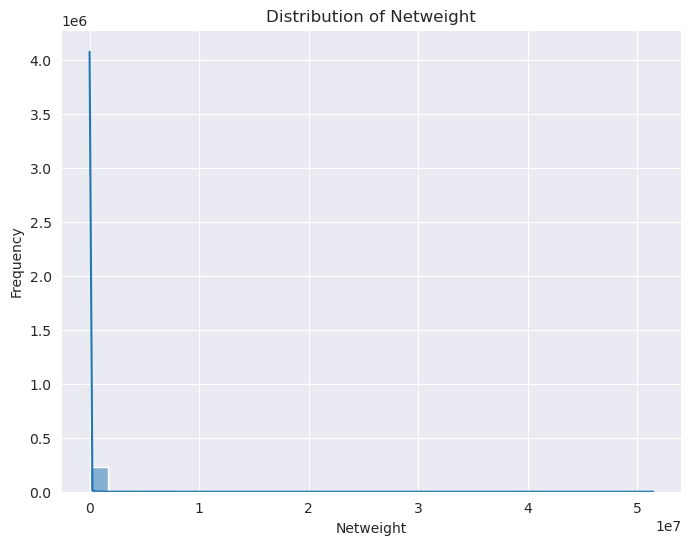

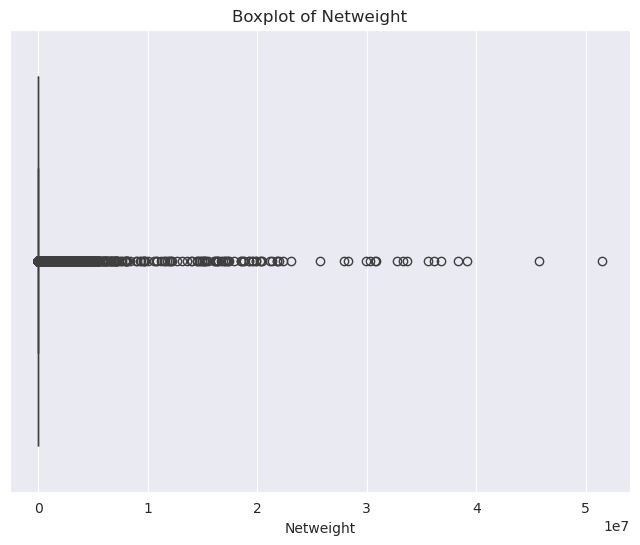

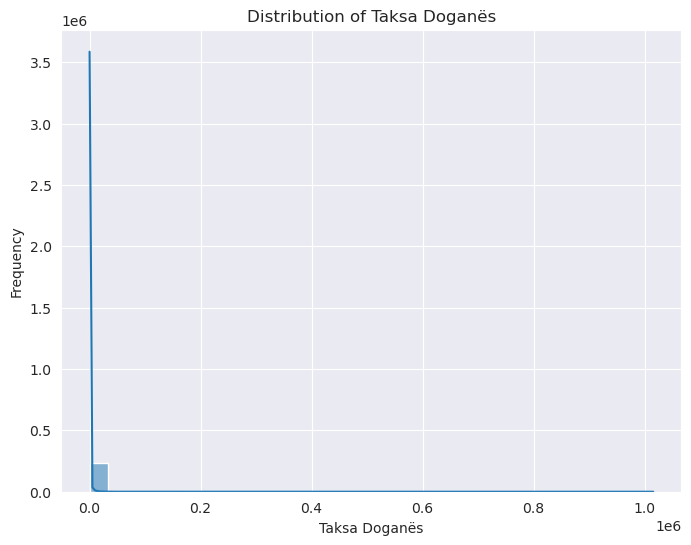

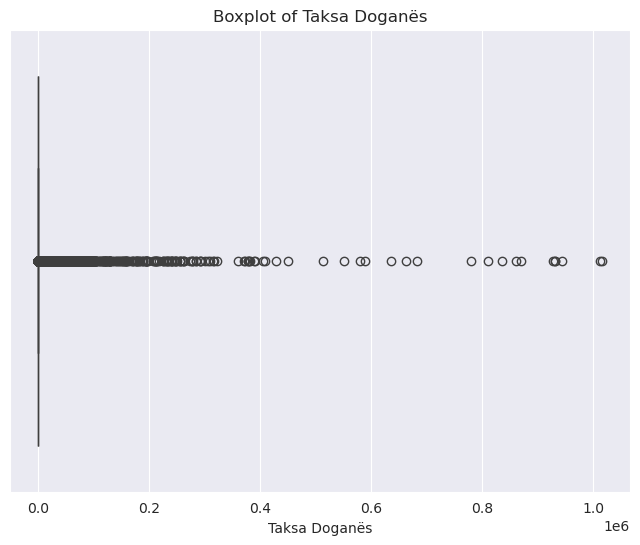

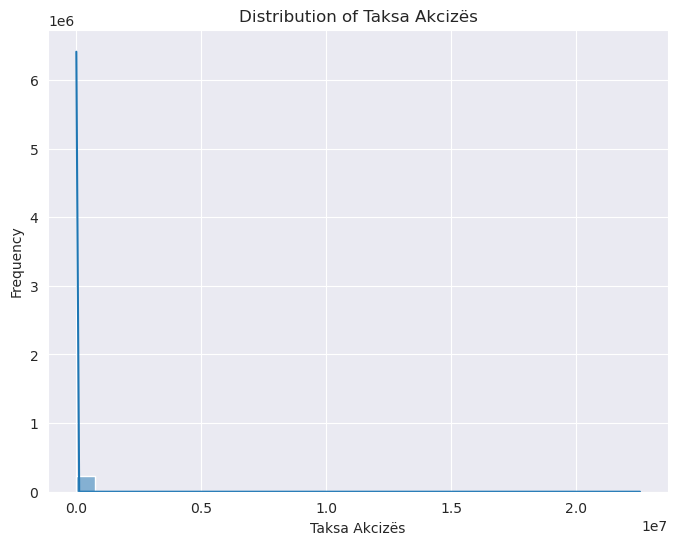

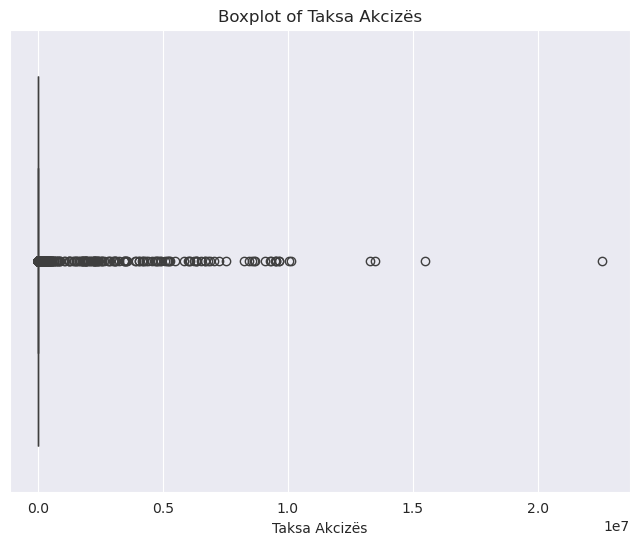

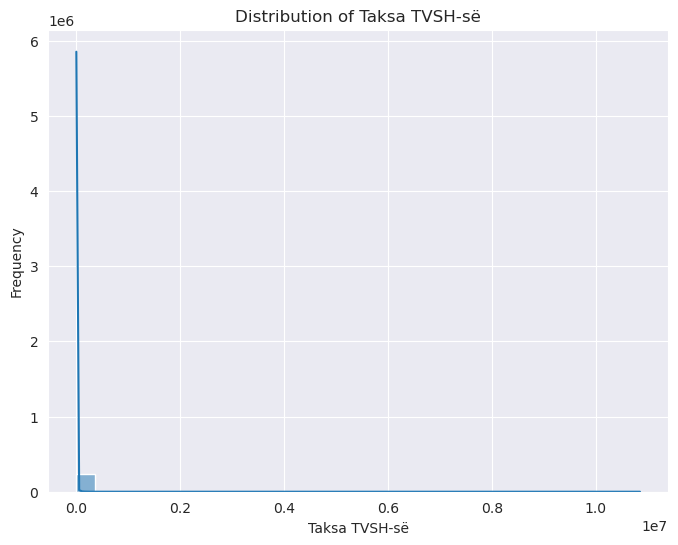

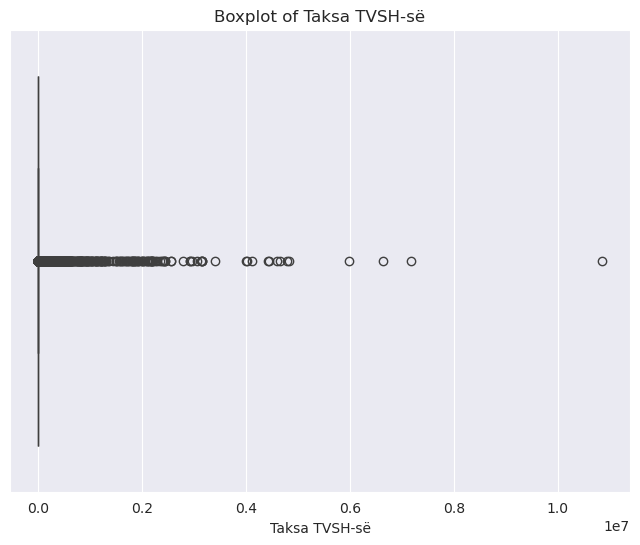

In [63]:
float_columns = ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']
for column in float_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to check for outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [64]:
albanian_to_ascii = {
   'ë': 'e', 'Ë': 'E',
    'ç': 'c', 'Ç': 'C',
    'ë': 'e', 'Ë': 'E',
}

def replace_albanian_chars(text):
    for alb_char, ascii_char in albanian_to_ascii.items():
        text = text.replace(alb_char, ascii_char)
    return text


df['Kodi Tarifor'] = df['Kodi Tarifor'].apply(replace_albanian_chars)
df.head()

,VITI,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
0,2024,1,IM4,CN - KINA,8807100090 - Helikat dhe rotoret dhe pjeset e ...,NaN,786.21,1.00,78.62,0.0,155.67
1,2024,1,IM4,PL - POLONIA,8529101190 - Antenat teleskopike dhe te tipit ...,NaN,20.18,0.60,2.02,0.0,4.00
2,2024,1,IM4,CN - KINA,8806229090 - Me peshen maksimale te ngritjes m...,NaN,23763.00,34.24,2376.30,0.0,4705.08
3,2024,1,IM4,BG - BULLGARIA,8413703090 - Pompat forcuese glandless per sis...,20.0,4896.05,295.00,0.00,0.0,0.00
4,2024,1,IM4,DE - GJERMANIA,"9405618090 - Shenjat e ndricimit, tabelat e nd...",NaN,3208.12,126.00,0.00,0.0,577.46


In [65]:
import matplotlib.pyplot as plt

# supports Unicode characters
plt.rcParams['font.family'] = 'DejaVu Sans'

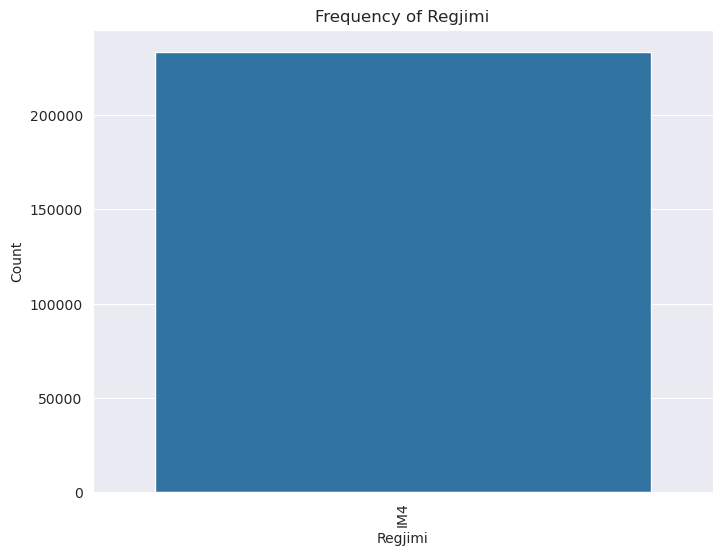

Category Counts for Regjimi:
Regjimi
IM4    233638
Name: count, dtype: int64

Category Percentages for Regjimi:
Regjimi
IM4    100.0
Name: proportion, dtype: float64


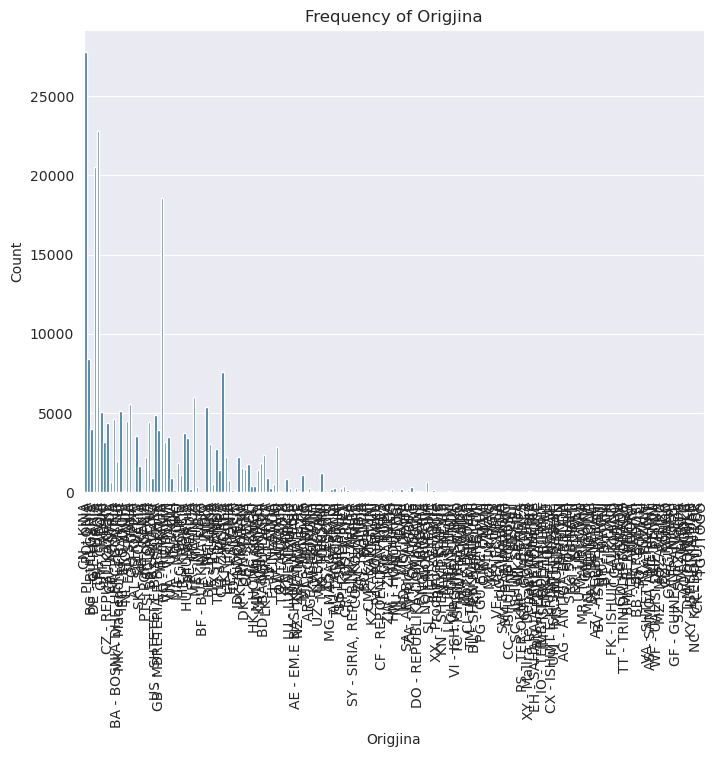

Category Counts for Origjina:
Origjina
CN - KINA              27784
TR - TURQIA            22811
DE - GJERMANIA         20510
IT - ITALIA            18573
PL - POLONIA            8393
                       ...  
SZ - SVAZILANDA            1
DM - DOMINIKA              1
DJ - GJIBUTI               1
NC - KALEDONIA E RE        1
TG - TOGO                  1
Name: count, Length: 194, dtype: int64

Category Percentages for Origjina:
Origjina
CN - KINA              11.891901
TR - TURQIA             9.763395
DE - GJERMANIA          8.778538
IT - ITALIA             7.949477
PL - POLONIA            3.592309
                         ...    
SZ - SVAZILANDA         0.000428
DM - DOMINIKA           0.000428
DJ - GJIBUTI            0.000428
NC - KALEDONIA E RE     0.000428
TG - TOGO               0.000428
Name: proportion, Length: 194, dtype: float64


In [66]:
object_columns = ['Regjimi', 'Origjina']
for column in object_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

    category_counts = df[column].value_counts()
    category_percentages = df[column].value_counts(normalize=True) * 100
    print(f"Category Counts for {column}:")
    print(category_counts)
    print(f"\nCategory Percentages for {column}:")
    print(category_percentages)

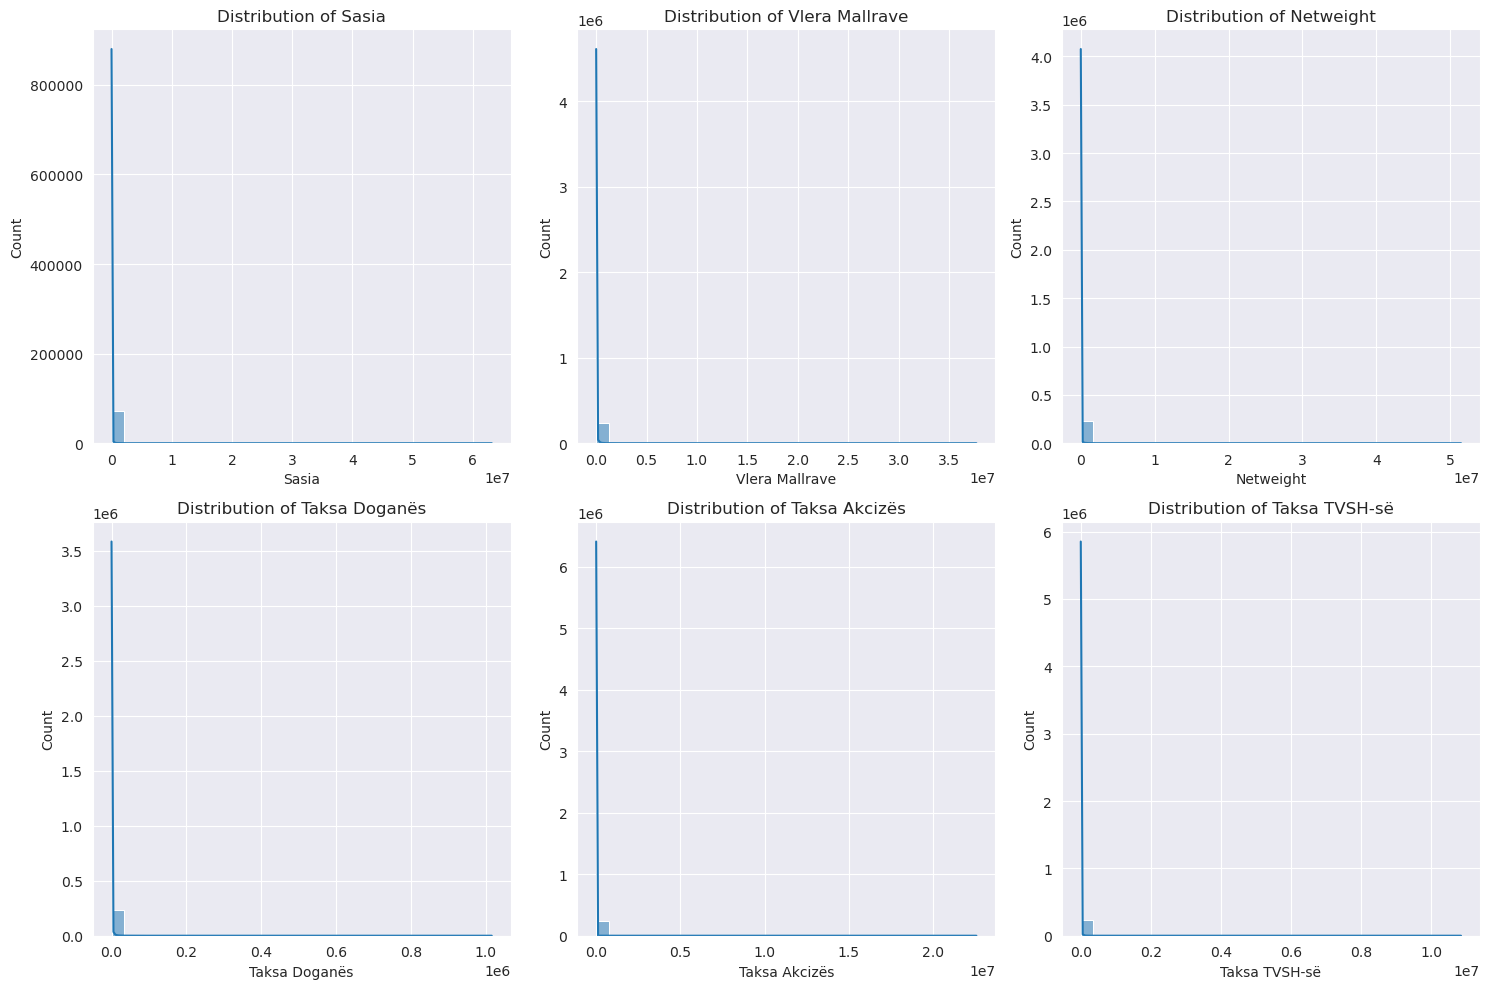

In [67]:
numeric_cols = ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']
df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True).astype(float)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

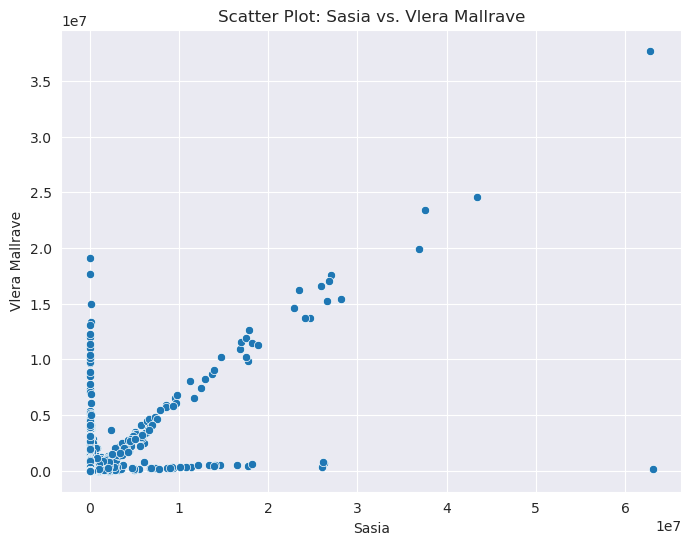

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sasia', y='Vlera Mallrave', data=df)
plt.title('Scatter Plot: Sasia vs. Vlera Mallrave')
plt.xlabel('Sasia')
plt.ylabel('Vlera Mallrave')
plt.show()

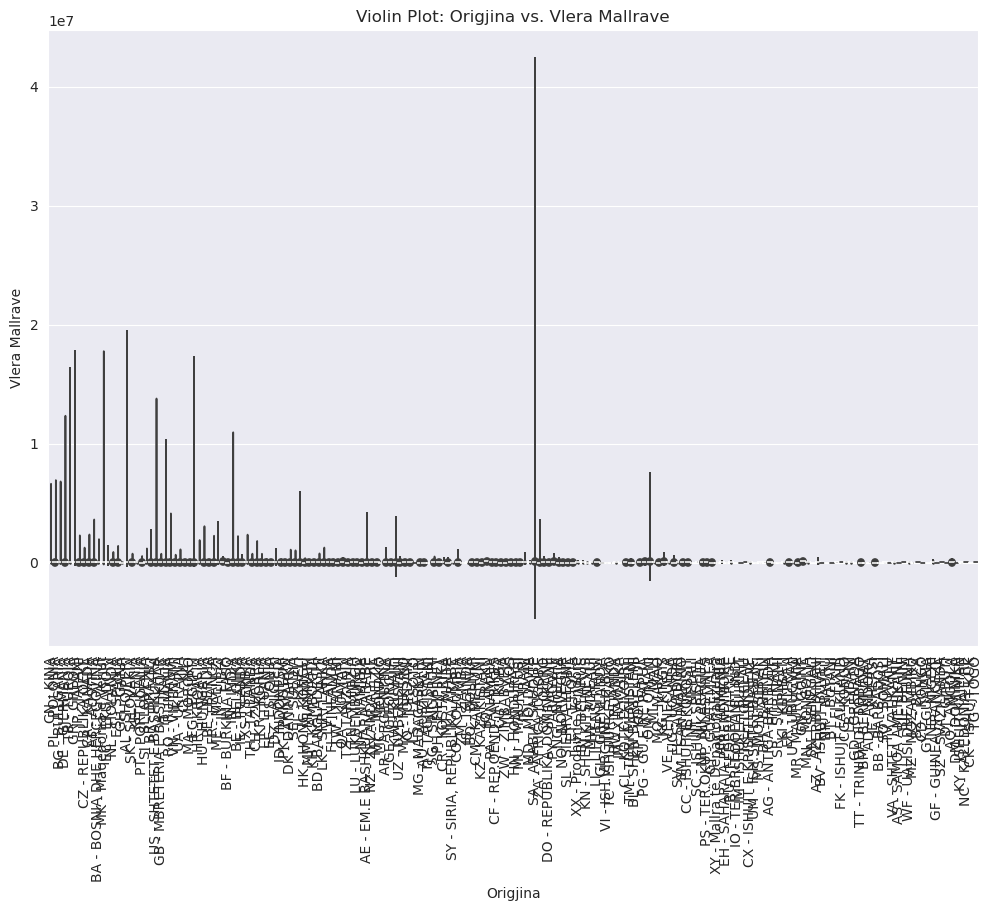

In [69]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Origjina', y='Vlera Mallrave', data=df)
plt.title('Violin Plot: Origjina vs. Vlera Mallrave')
plt.xlabel('Origjina')
plt.ylabel('Vlera Mallrave')
plt.xticks(rotation=90)
plt.show()

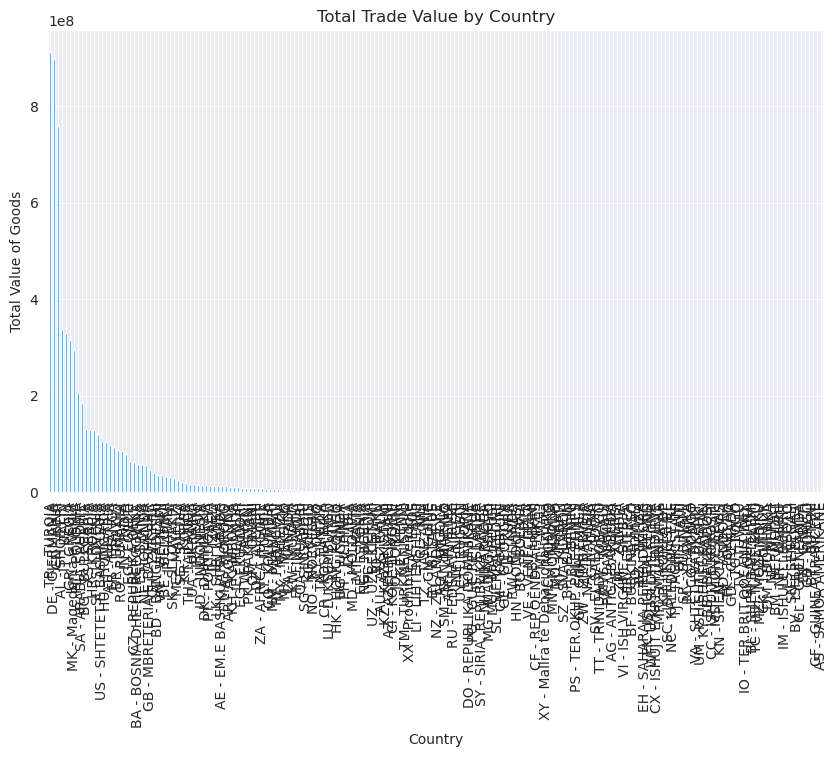

In [70]:
plt.figure(figsize=(10, 6))
df.groupby('Origjina')['Vlera Mallrave'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Trade Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Value of Goods')
plt.show()

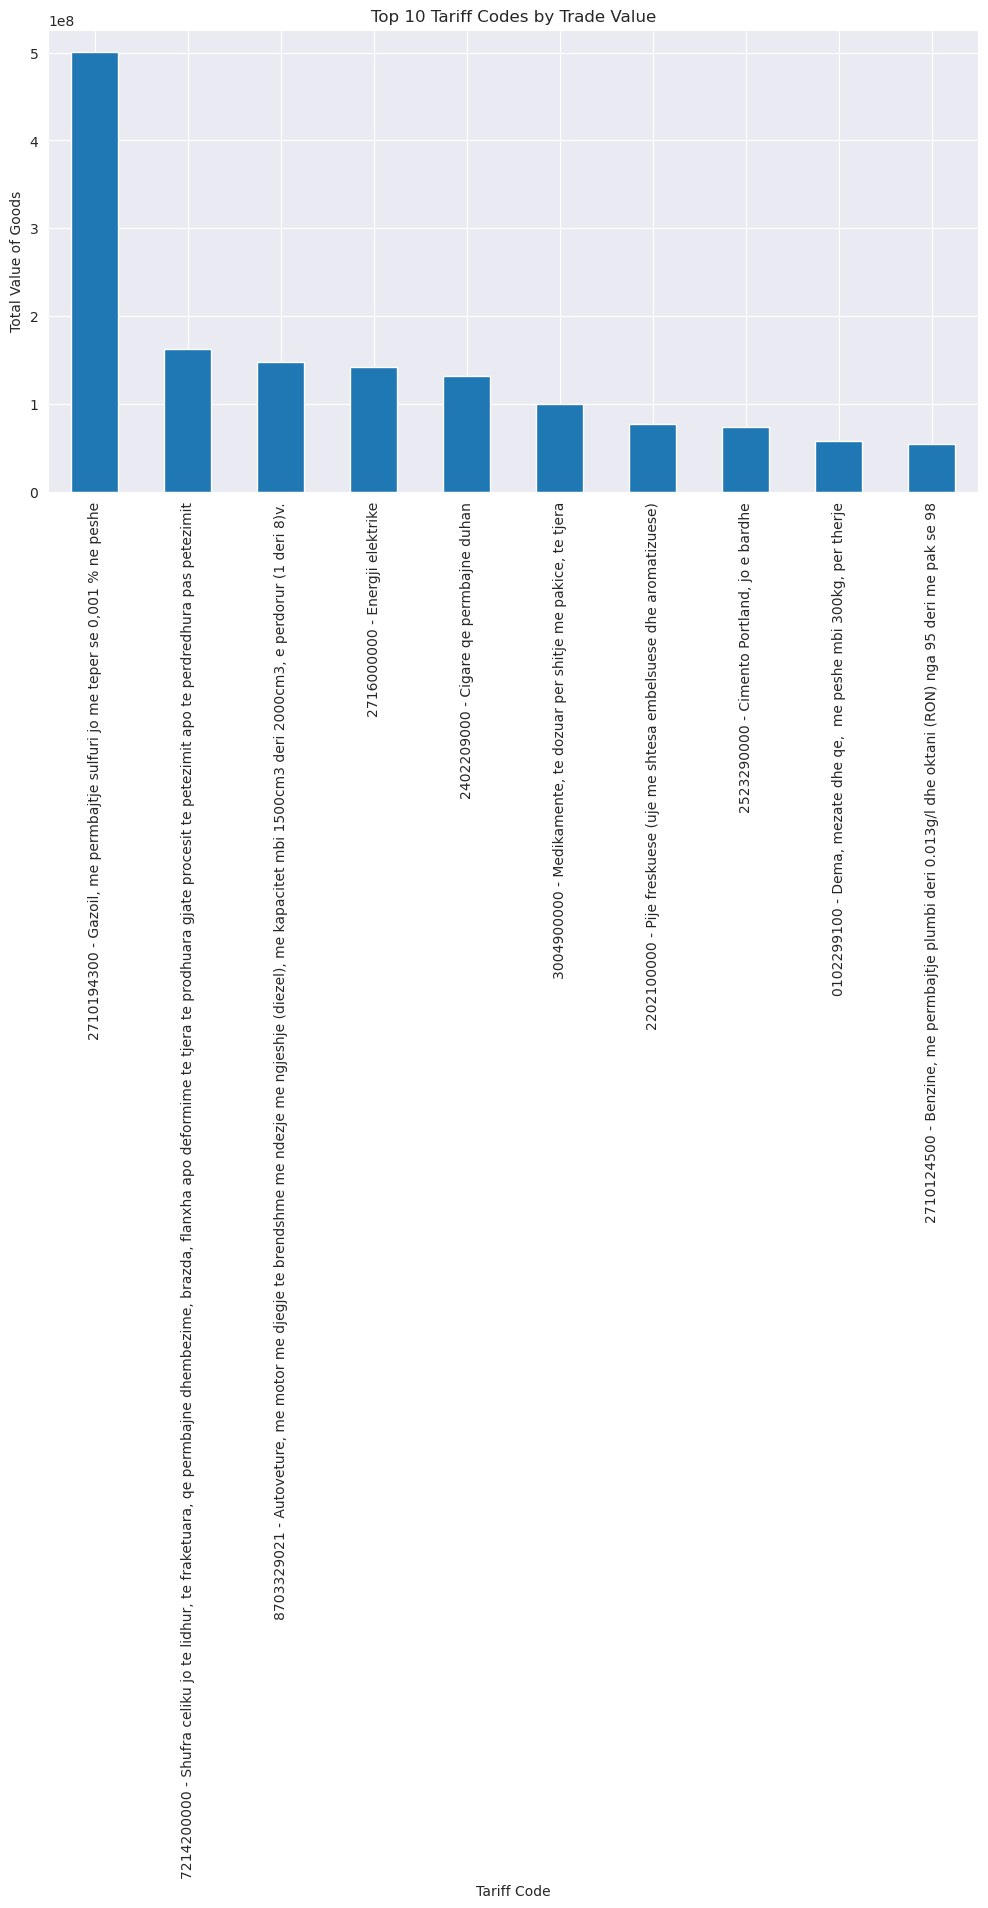

In [71]:
plt.figure(figsize=(12, 6))
df.groupby('Kodi Tarifor')['Vlera Mallrave'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Tariff Codes by Trade Value')
plt.xlabel('Tariff Code')
plt.ylabel('Total Value of Goods')
plt.show()

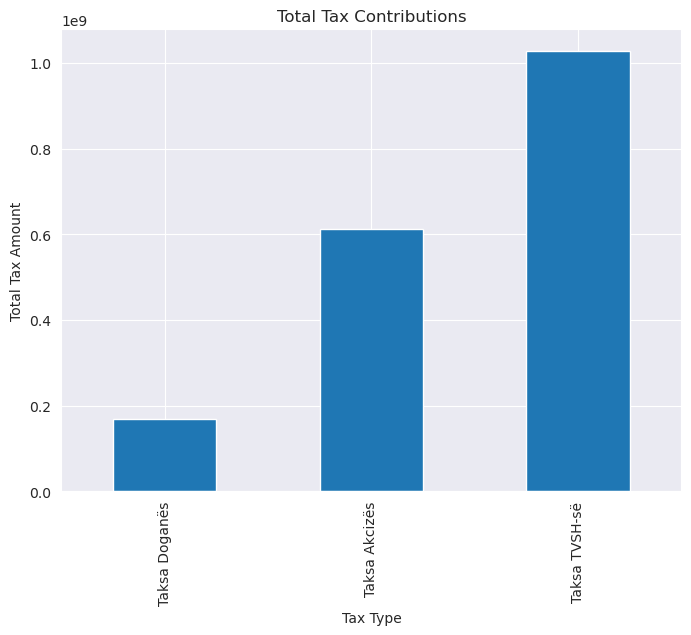

In [72]:
tax_columns = ['Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']
total_taxes = df[tax_columns].sum()
plt.figure(figsize=(8, 6))
total_taxes.plot(kind='bar', stacked=True)
plt.title('Total Tax Contributions')
plt.xlabel('Tax Type')
plt.ylabel('Total Tax Amount')
plt.show()

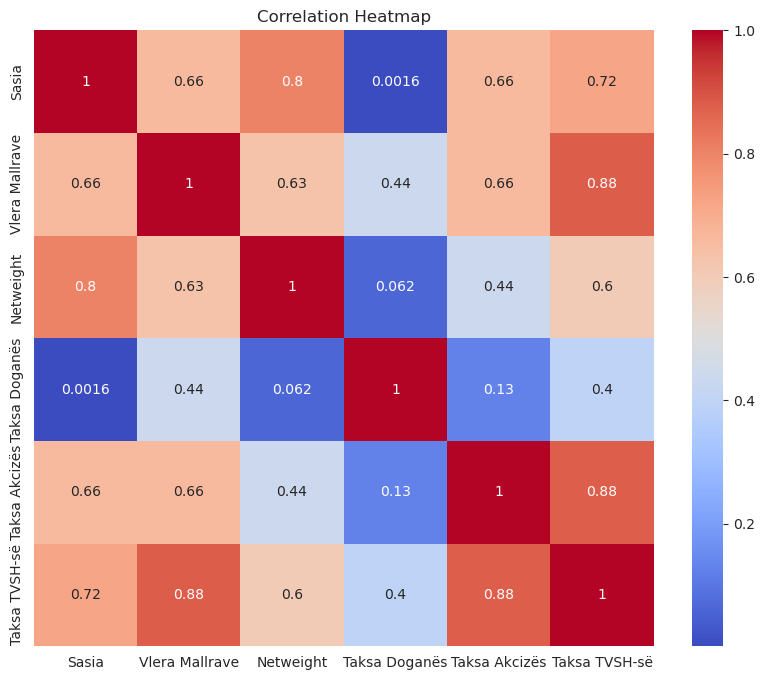

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [74]:
correlation_matrix = df[['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa TVSH-së']].corr()
print(correlation_matrix)

                   Sasia  Vlera Mallrave  Netweight  Taksa Doganës  \
Sasia           1.000000        0.659401   0.801509       0.001626   
Vlera Mallrave  0.659401        1.000000   0.631587       0.436319   
Netweight       0.801509        0.631587   1.000000       0.061620   
Taksa Doganës   0.001626        0.436319   0.061620       1.000000   
Taksa TVSH-së   0.719401        0.882032   0.601405       0.398431   

                Taksa TVSH-së  
Sasia                0.719401  
Vlera Mallrave       0.882032  
Netweight            0.601405  
Taksa Doganës        0.398431  
Taksa TVSH-së        1.000000  



## Correlation Analysis Summary

1. Sasia and Netweight (0.801509):
   - Strong Positive Correlation: As the quantity (Sasia) increases, the net weight (Netweight) of goods also tends to increase. Larger quantities of goods typically have higher net weights.

2. Sasia and Vlera Mallrave (0.659401):
   - Moderate Positive Correlation: Higher quantities are associated with higher values of goods, which is expected.

3. Sasia and Taksa TVSH-së (0.719401):
   - Strong Positive Correlation: As the quantity increases, the VAT (Taksa TVSH-së) also increases. This is logical since VAT is usually calculated as a percentage of the value of goods, which correlates with quantity.

4. Sasia and Taksa Doganës (0.001626):
   - Very Weak Correlation: Almost no relationship between quantity and customs duty (Taksa Doganës), suggesting that customs duty is likely dependent on other factors (e.g., type of goods, origin).

5. Vlera Mallrave and Taksa TVSH-së (0.882032):
   - Very Strong Positive Correlation: A high correlation between the value of goods (Vlera Mallrave) and VAT (Taksa TVSH-së). This is expected as VAT is generally calculated as a percentage of the value of goods.

6. Vlera Mallrave and Netweight (0.631587):
   - Moderate Positive Correlation: Higher values of goods are associated with higher net weights, suggesting that more valuable goods might also be heavier or larger in quantity.


In [75]:
df_notnull = df[df['Sasia'].notnull()]
df_null = df[df['Sasia'].isnull()]

X = df_notnull[['Netweight', 'Vlera Mallrave', 'Taksa TVSH-së']]
y = df_notnull['Sasia']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

X_null = df_null[['Netweight', 'Vlera Mallrave', 'Taksa TVSH-së']]
X_null_scaled = scaler.transform(X_null)
df_null.loc[:, 'Sasia'] = model.predict(X_null_scaled)

df = pd.concat([df_notnull, df_null])
print("Negative values in 'Sasia':", df[df['Sasia'] < 0].shape[0])

Negative values in 'Sasia': 0


In [76]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns:\n", round(missing_percent,2))

Missing Value Percentage by Columns:
 VITI              0.0
MUAJI             0.0
Regjimi           0.0
Origjina          0.0
Kodi Tarifor      0.0
Sasia             0.0
Vlera Mallrave    0.0
Netweight         0.0
Taksa Doganës     0.0
Taksa Akcizës     0.0
Taksa TVSH-së     0.0
dtype: float64


In [77]:
print(df[['Sasia', 'Netweight', 'Vlera Mallrave', 'Taksa TVSH-së']].head(30))


           Sasia    Netweight  Vlera Mallrave  Taksa TVSH-së
3          20.00       295.00    4.896050e+03           0.00
11       2112.00      6846.92    3.867084e+04        7552.19
12          1.00         1.00    1.468500e+02          29.08
17        240.00        11.84    1.973400e+02          39.07
18      12920.00      1423.24    9.193170e+03        1654.77
19         30.00         2.18    1.817000e+01           3.27
74        200.00      4500.00    7.200000e+03         576.00
75         22.00       500.00    9.260000e+02          74.08
95        300.00       227.00    1.926700e+02           0.00
96       1095.08      1095.08    2.692400e+03         528.13
97     174600.00    175727.70    1.087140e+05       31888.27
98        139.50       139.50    6.121400e+03         918.17
100        27.00        18.95    8.871000e+01          19.14
101    414779.00    211040.00    1.257566e+05       23691.06
102   2111621.48   1069580.00    6.437155e+05      148239.69
149        50.00        

In [78]:
constant_columns = df.columns[df.nunique() == 1]
print("Constant columns:", constant_columns)

Constant columns: Index(['VITI', 'Regjimi'], dtype='object')


In [79]:
df.drop(columns=constant_columns, inplace=True)

In [80]:
df['Origjina'] = df['Origjina'].astype('category')
df['Kodi Tarifor'] = df['Kodi Tarifor'].astype('category')

In [81]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers


for col in ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']:
    outliers = detect_outliers_iqr(df[col])
    print(f"Përjashtuesit në {col}:\n", outliers)

Përjashtuesit në Sasia:
 18        1.292000e+04
97        1.746000e+05
101       4.147790e+05
102       2.111621e+06
174       6.517837e+06
              ...     
233602    4.675841e+04
233606    7.202164e+03
233609    1.233720e+04
233610    1.284245e+05
233619    5.463209e+03
Name: Sasia, Length: 38836, dtype: float64
Përjashtuesit në Vlera Mallrave:
 11        3.867084e+04
97        1.087140e+05
101       1.257566e+05
102       6.437155e+05
174       3.727560e+06
              ...     
233583    2.173867e+05
233596    5.672577e+04
233602    4.801785e+04
233610    1.663886e+05
233619    6.609845e+04
Name: Vlera Mallrave, Length: 34822, dtype: float64
Përjashtuesit në Netweight:
 11        6.846920e+03
74        4.500000e+03
97        1.757277e+05
101       2.110400e+05
102       1.069580e+06
              ...     
233596    2.395987e+04
233600    1.478400e+04
233602    8.270320e+03
233609    4.900000e+03
233610    4.929420e+04
Name: Netweight, Length: 40636, dtype: float64
Përjashtues

In [82]:
for col in ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [83]:
for col in ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Përjashtuesit pas trajtimit në {col}:\n", outliers)

Përjashtuesit pas trajtimit në Sasia:
 Empty DataFrame
Columns: [MUAJI, Origjina, Kodi Tarifor, Sasia, Vlera Mallrave, Netweight, Taksa Doganës, Taksa Akcizës, Taksa TVSH-së]
Index: []
Përjashtuesit pas trajtimit në Vlera Mallrave:
 Empty DataFrame
Columns: [MUAJI, Origjina, Kodi Tarifor, Sasia, Vlera Mallrave, Netweight, Taksa Doganës, Taksa Akcizës, Taksa TVSH-së]
Index: []
Përjashtuesit pas trajtimit në Netweight:
 Empty DataFrame
Columns: [MUAJI, Origjina, Kodi Tarifor, Sasia, Vlera Mallrave, Netweight, Taksa Doganës, Taksa Akcizës, Taksa TVSH-së]
Index: []
Përjashtuesit pas trajtimit në Taksa Doganës:
 Empty DataFrame
Columns: [MUAJI, Origjina, Kodi Tarifor, Sasia, Vlera Mallrave, Netweight, Taksa Doganës, Taksa Akcizës, Taksa TVSH-së]
Index: []
Përjashtuesit pas trajtimit në Taksa Akcizës:
 Empty DataFrame
Columns: [MUAJI, Origjina, Kodi Tarifor, Sasia, Vlera Mallrave, Netweight, Taksa Doganës, Taksa Akcizës, Taksa TVSH-së]
Index: []
Përjashtuesit pas trajtimit në Taksa TVSH-së:


In [84]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numerical_columns].skew()
print("Koeficienti i anueshmërisë:\n", skewness)

Koeficienti i anueshmërisë:
 MUAJI            -0.024149
Sasia             1.205208
Vlera Mallrave    1.208138
Netweight         1.200654
Taksa Doganës     1.198969
Taksa Akcizës     0.000000
Taksa TVSH-së     1.206022
dtype: float64


In [85]:
for col in ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']:
    df[col + '_log'] = np.log1p(df[col])

print("\nKoeficienti i anueshmërisë pas transformimit logaritmik:")
print(df[['Sasia_log', 'Vlera Mallrave_log', 'Netweight_log', 'Taksa Doganës_log', 'Taksa Akcizës_log', 'Taksa TVSH-së_log']].skew())


Koeficienti i anueshmërisë pas transformimit logaritmik:
Sasia_log            -0.133584
Vlera Mallrave_log   -0.427912
Netweight_log        -0.139545
Taksa Doganës_log     0.282455
Taksa Akcizës_log     0.000000
Taksa TVSH-së_log    -0.476873
dtype: float64


In [86]:
# df['Origjina'] = df['Origjina'].str.split(' - ').str[1]


In [87]:
df.head()

,MUAJI,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së,Sasia_log,Vlera Mallrave_log,Netweight_log,Taksa Doganës_log,Taksa Akcizës_log,Taksa TVSH-së_log
3,1,BG - BULLGARIA,8413703090 - Pompat forcuese glandless per sis...,20.000000,4896.050000,295.00000,0.00000,0.0,0.00000,3.044522,8.496388,5.690359,0.000000,0.0,0.000000
11,1,CN - KINA,8504406090 - Te Tjera,2112.000000,23824.450725,4442.24375,249.01875,0.0,3224.22375,7.655864,10.078510,8.399140,5.521536,0.0,8.078758
12,1,CZ - REPUBLIKA QEKE,8504406090 - Te Tjera,1.000000,146.850000,1.00000,14.69000,0.0,29.08000,0.693147,4.996198,0.693147,2.753024,0.0,3.403860
17,1,EC - EKUADORI,0603110000 - Trendafilat,240.000000,197.340000,11.84000,19.73000,0.0,39.07000,5.484797,5.289983,2.552565,3.031582,0.0,3.690628
18,1,NL - HOLANDA,0603197000 - Te tjera,5285.082812,9193.170000,1423.24000,0.00000,0.0,1654.77000,8.572833,9.126325,7.261394,0.000000,0.0,7.412021


In [88]:
df['Kodi Tarifor'] = df['Kodi Tarifor'].str.split(' - ').str[0]

In [89]:
df.head()

,MUAJI,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së,Sasia_log,Vlera Mallrave_log,Netweight_log,Taksa Doganës_log,Taksa Akcizës_log,Taksa TVSH-së_log
3,1,BG - BULLGARIA,8413703090,20.000000,4896.050000,295.00000,0.00000,0.0,0.00000,3.044522,8.496388,5.690359,0.000000,0.0,0.000000
11,1,CN - KINA,8504406090,2112.000000,23824.450725,4442.24375,249.01875,0.0,3224.22375,7.655864,10.078510,8.399140,5.521536,0.0,8.078758
12,1,CZ - REPUBLIKA QEKE,8504406090,1.000000,146.850000,1.00000,14.69000,0.0,29.08000,0.693147,4.996198,0.693147,2.753024,0.0,3.403860
17,1,EC - EKUADORI,0603110000,240.000000,197.340000,11.84000,19.73000,0.0,39.07000,5.484797,5.289983,2.552565,3.031582,0.0,3.690628
18,1,NL - HOLANDA,0603197000,5285.082812,9193.170000,1423.24000,0.00000,0.0,1654.77000,8.572833,9.126325,7.261394,0.000000,0.0,7.412021


In [90]:
missing_values = df.isnull().sum()
total_dataset = np.prod(df.shape)
total_missing = missing_values.sum()
percent = (total_missing / total_dataset) * 100
percent

np.float64(0.0)

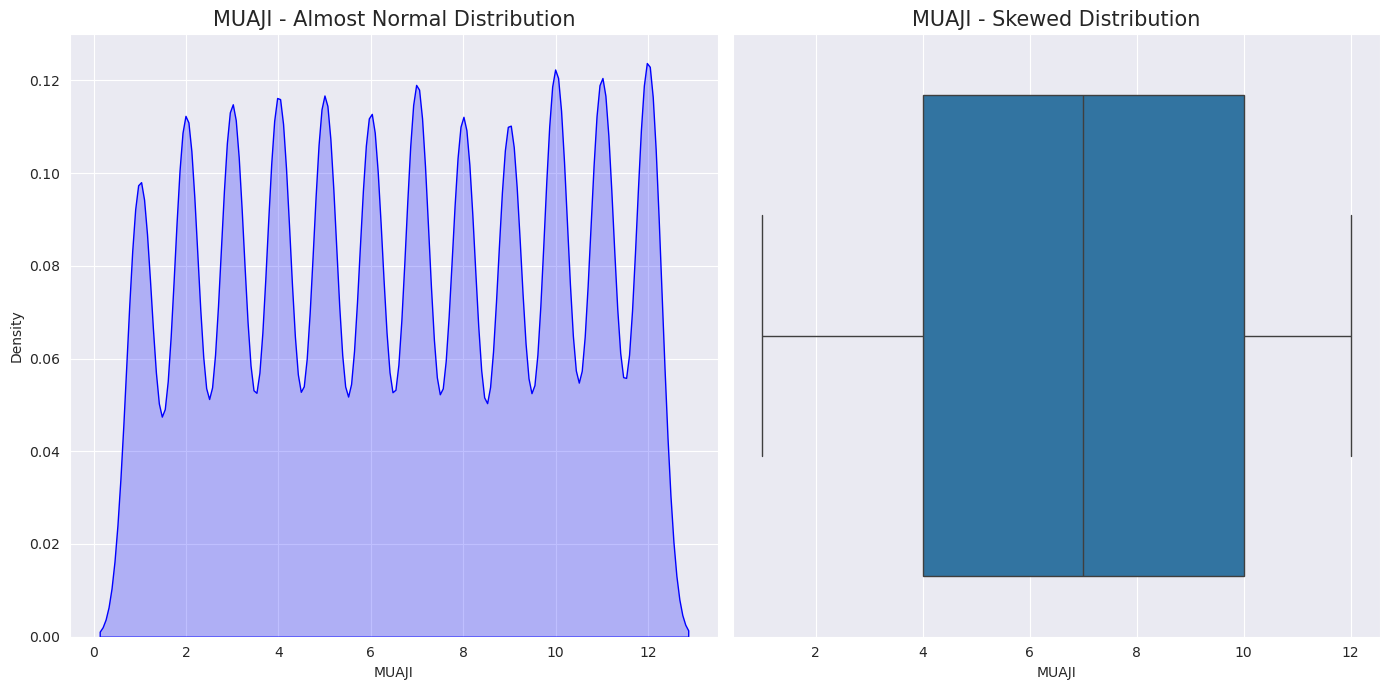

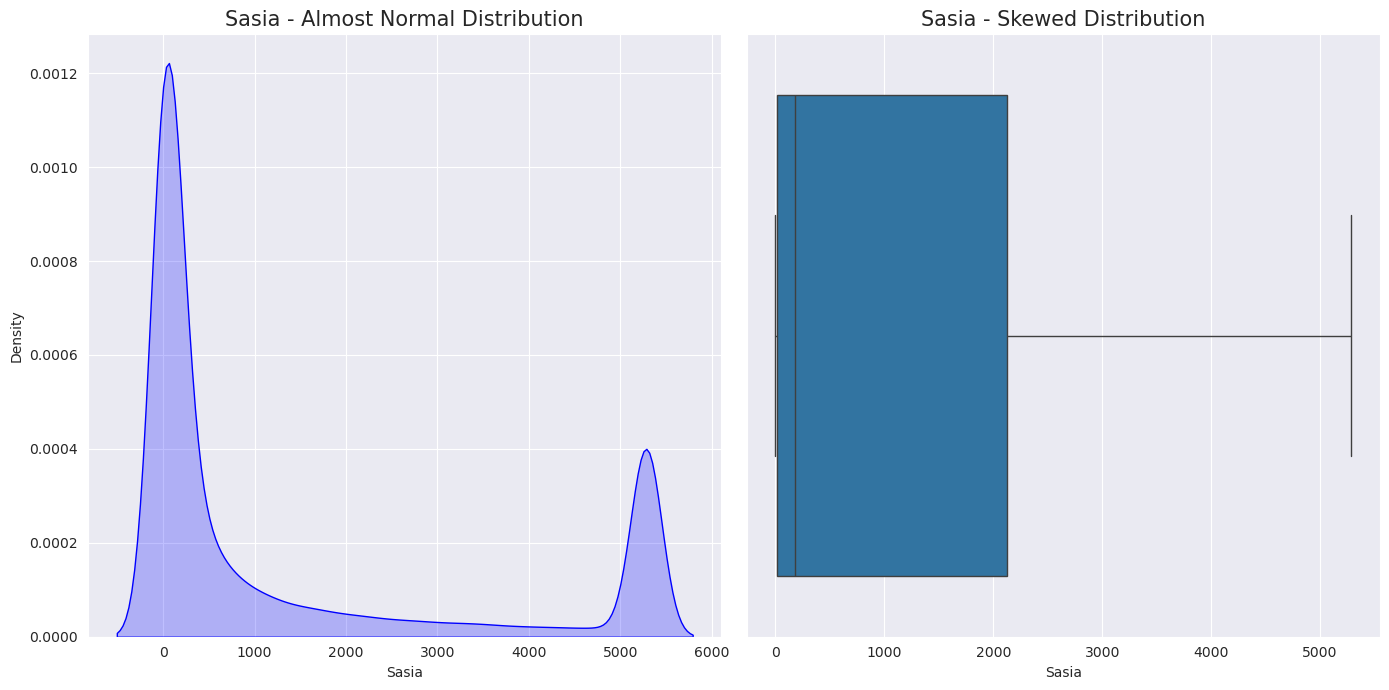

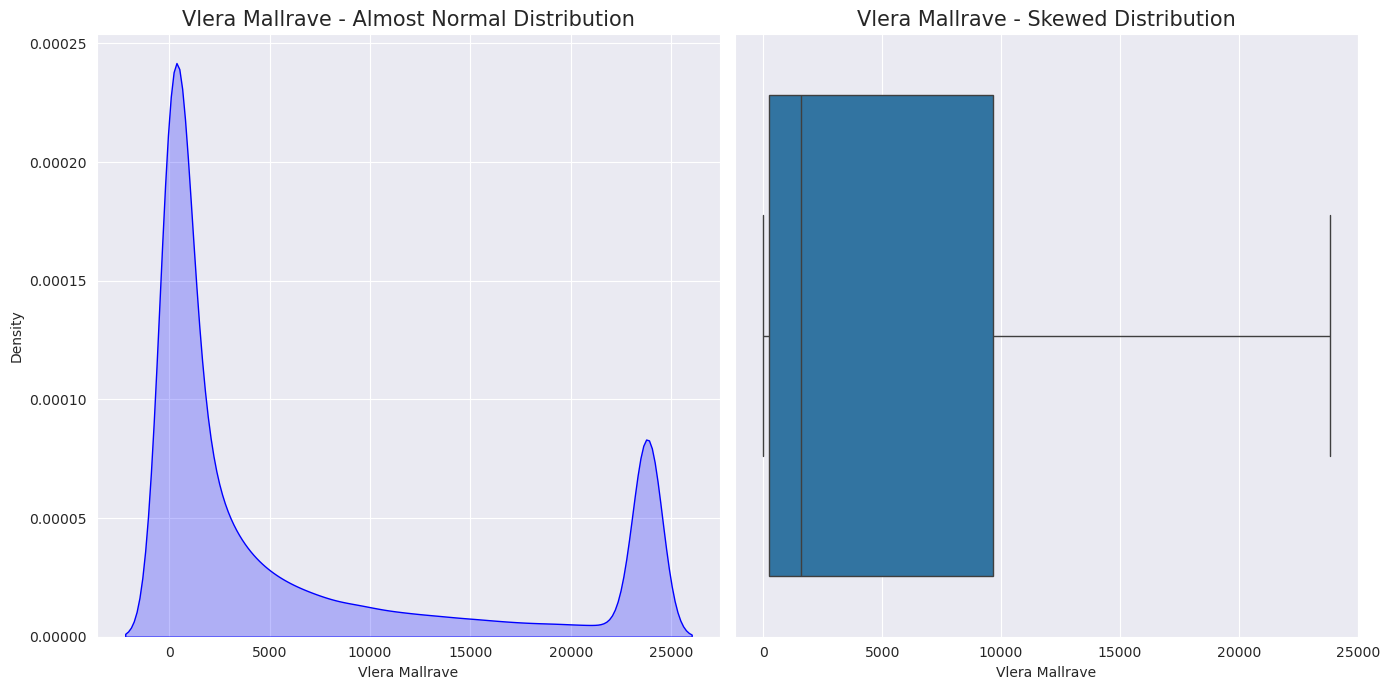

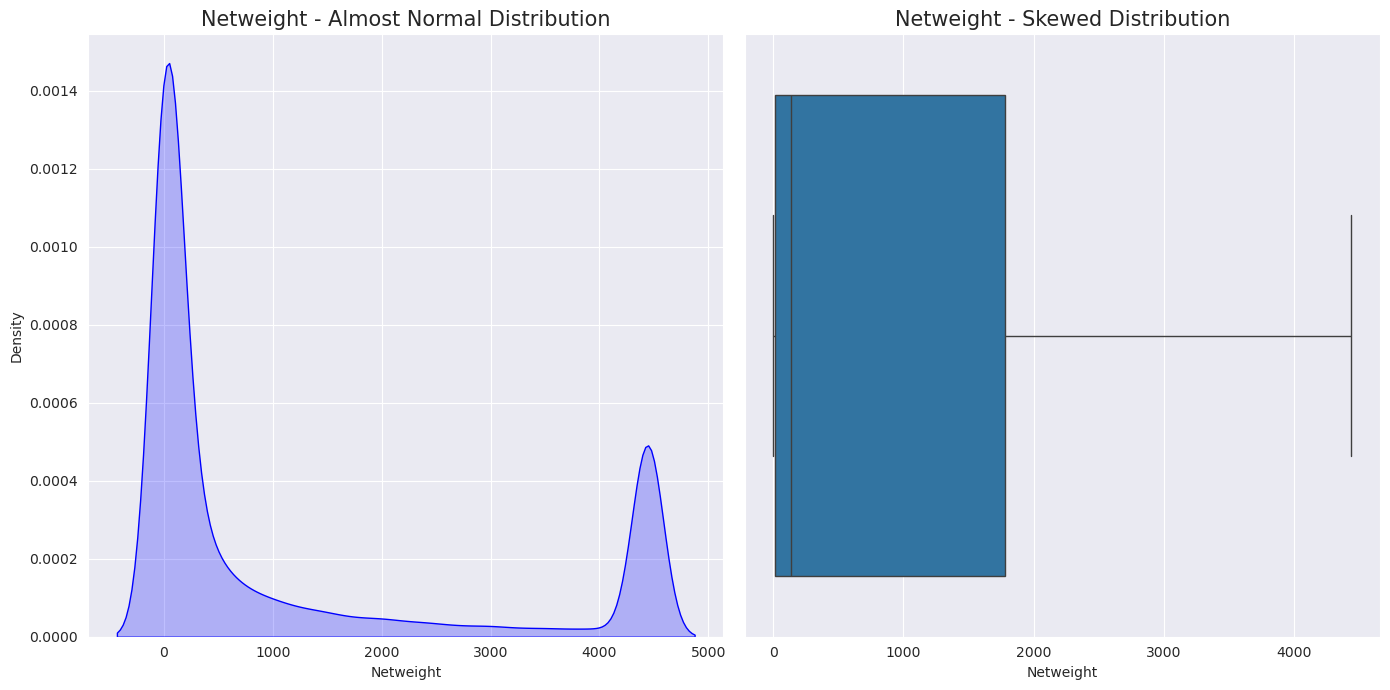

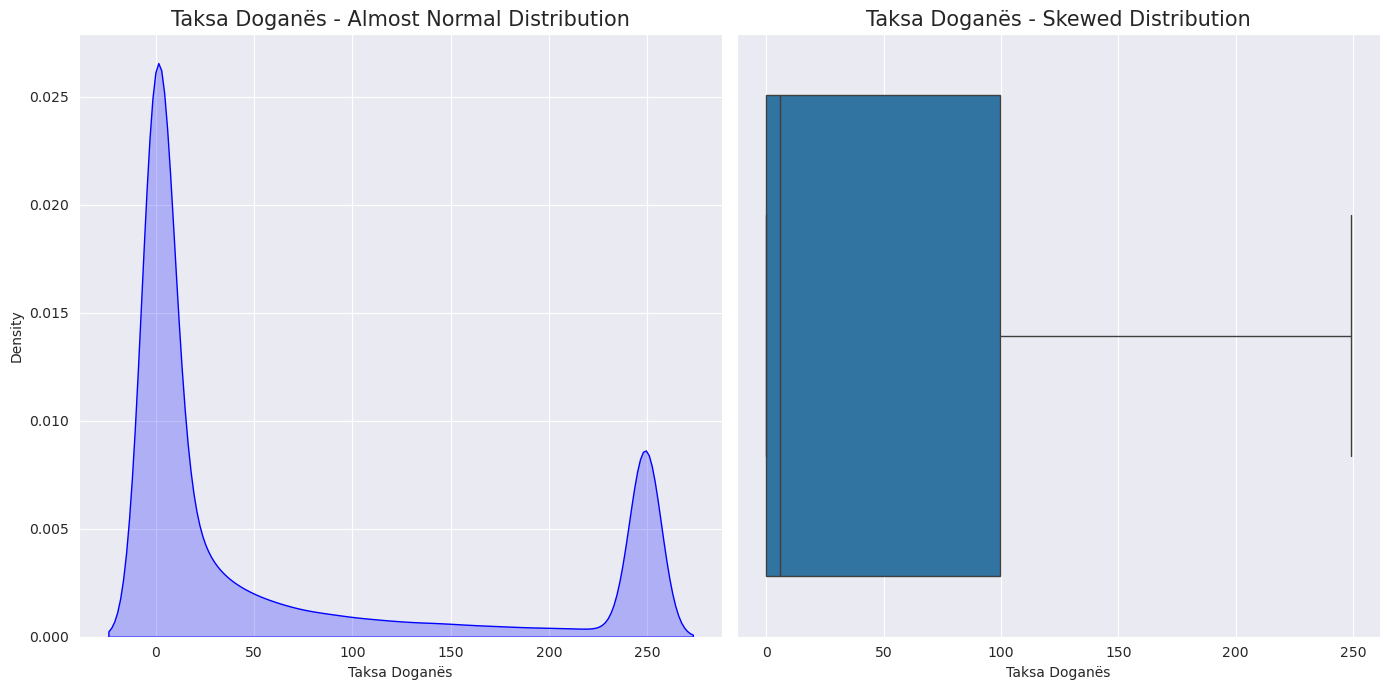

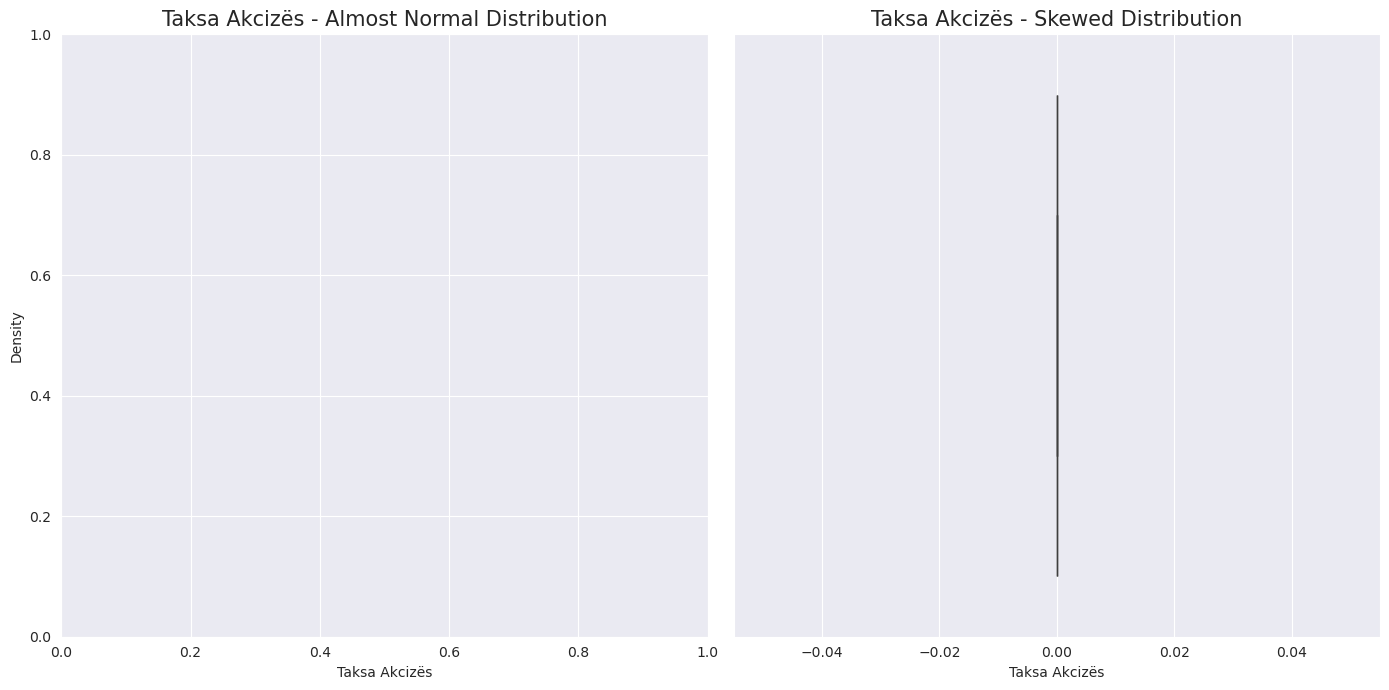

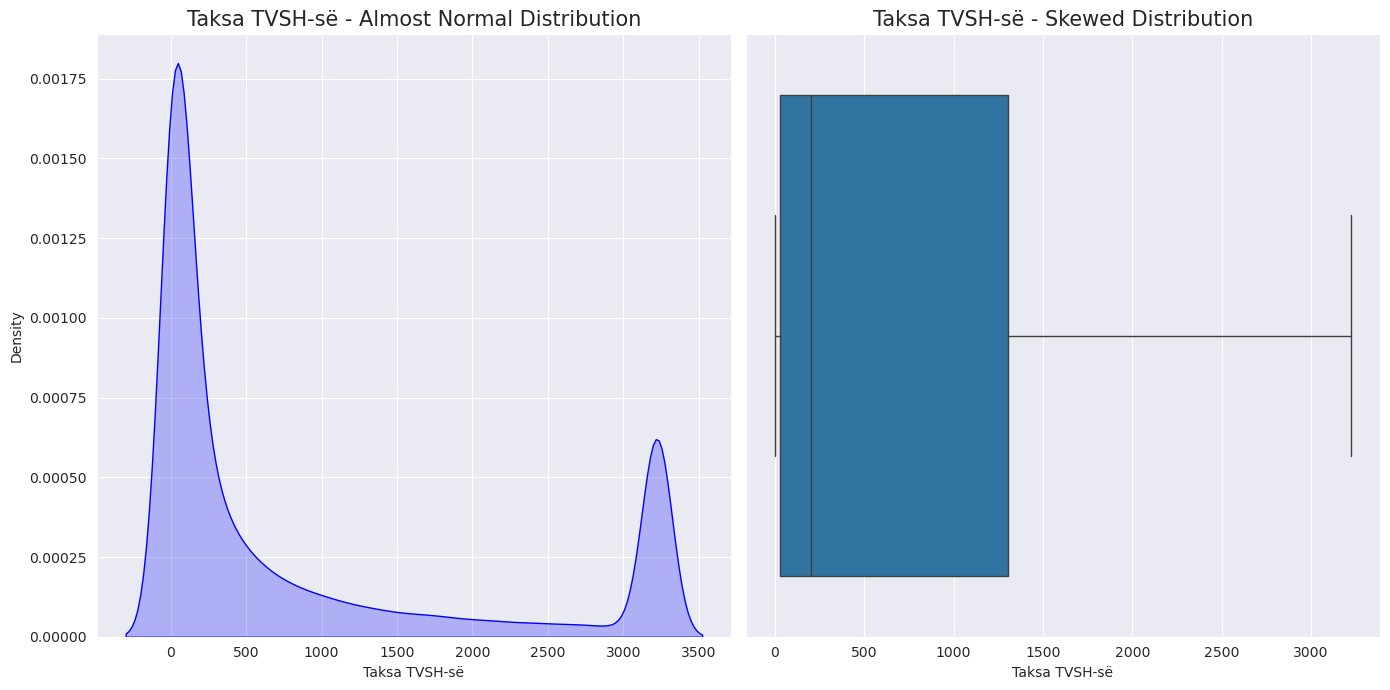

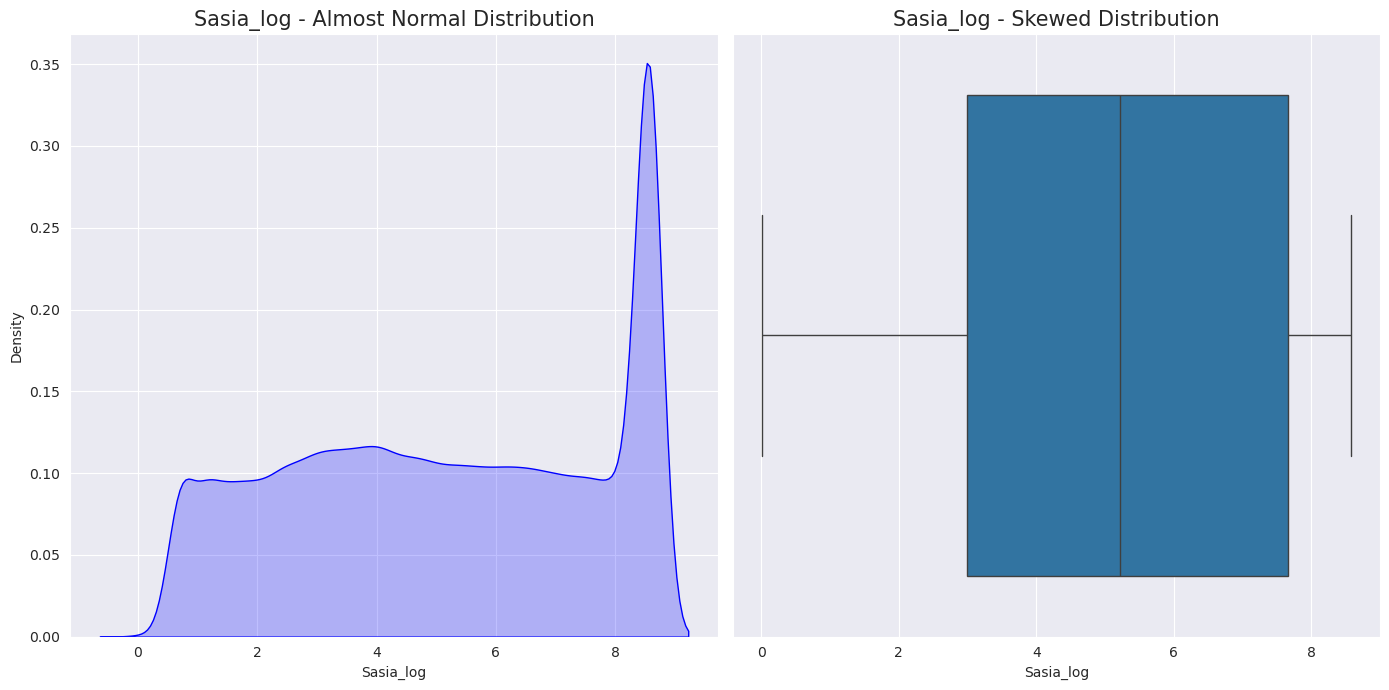

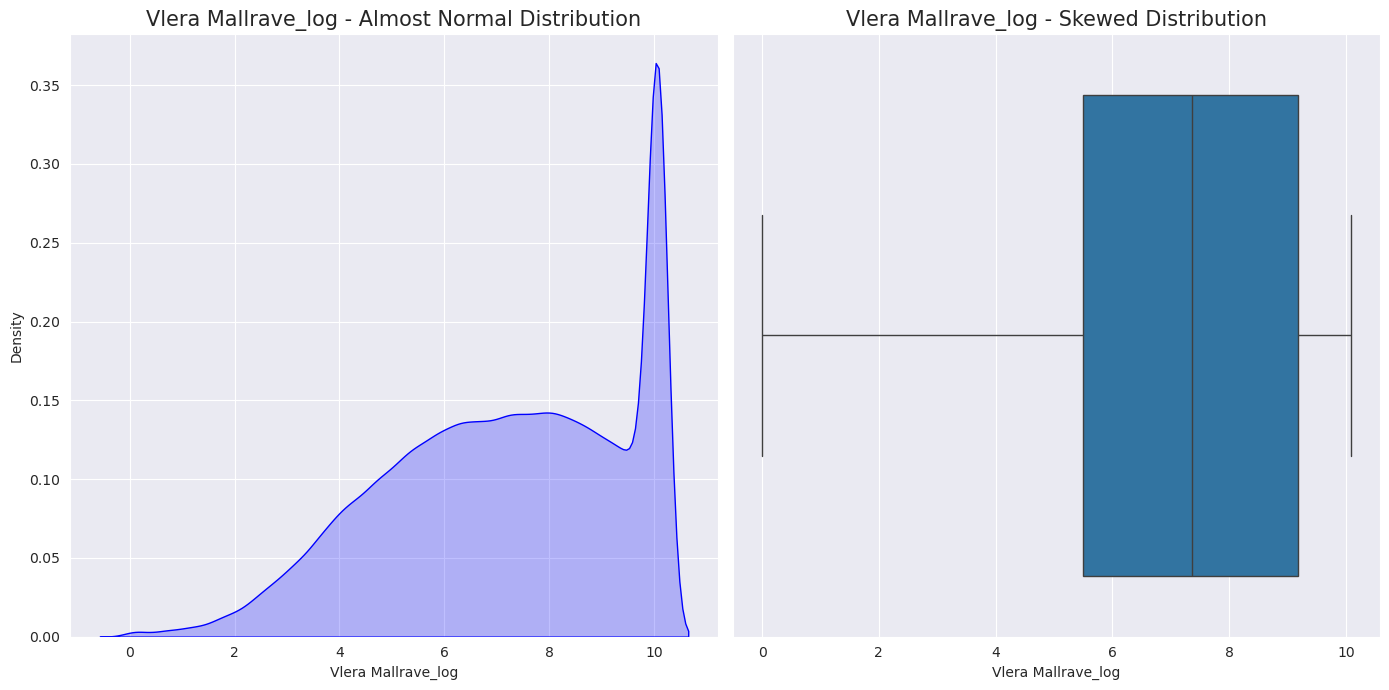

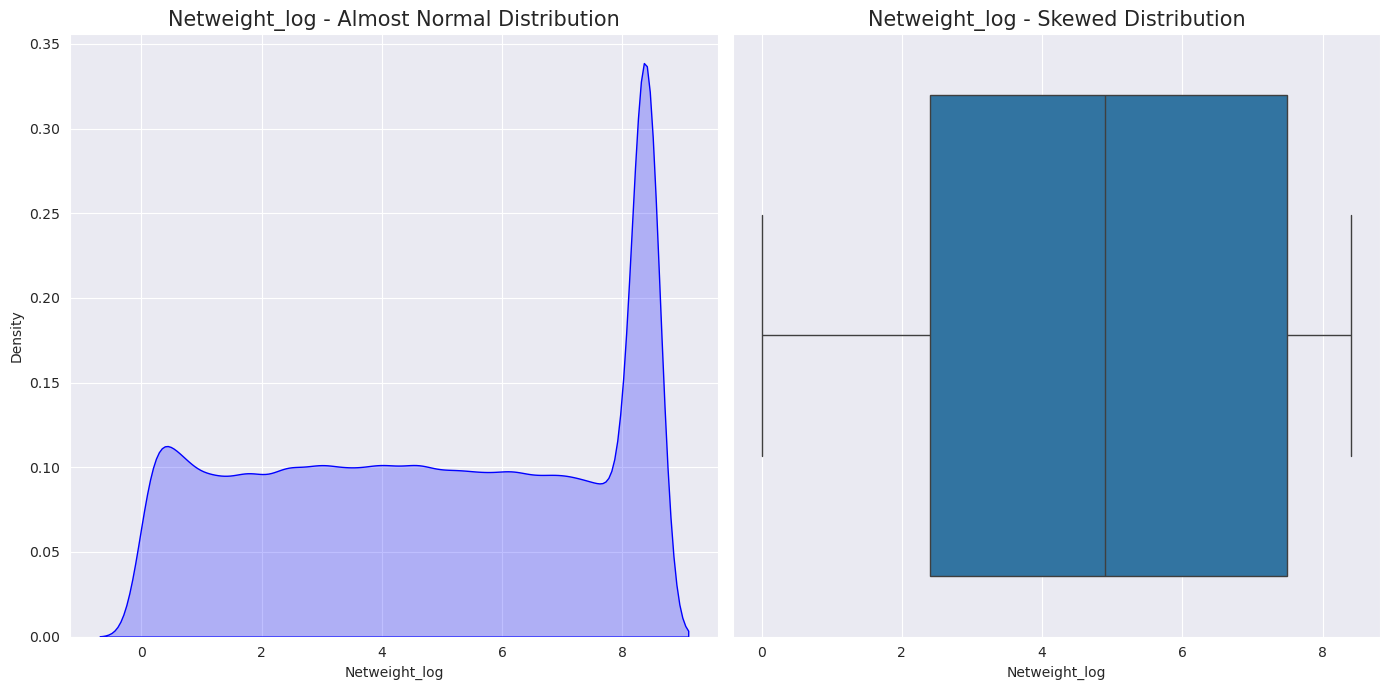

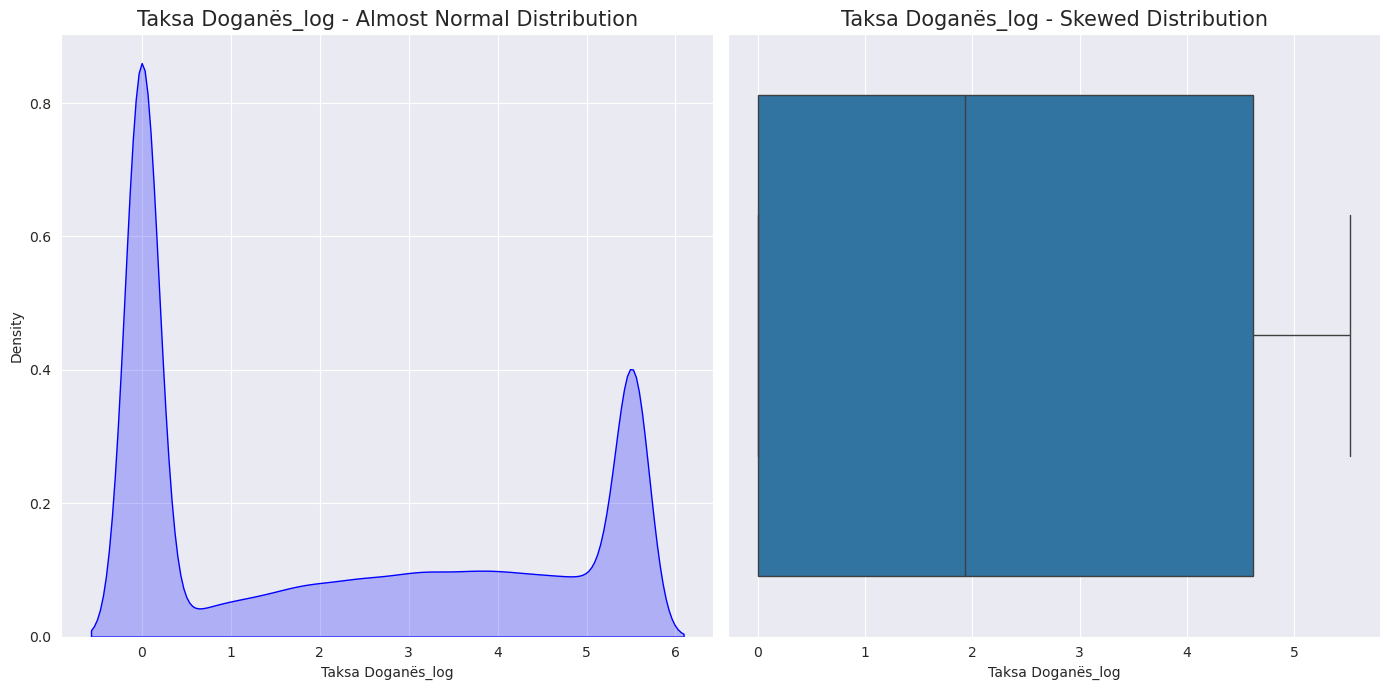

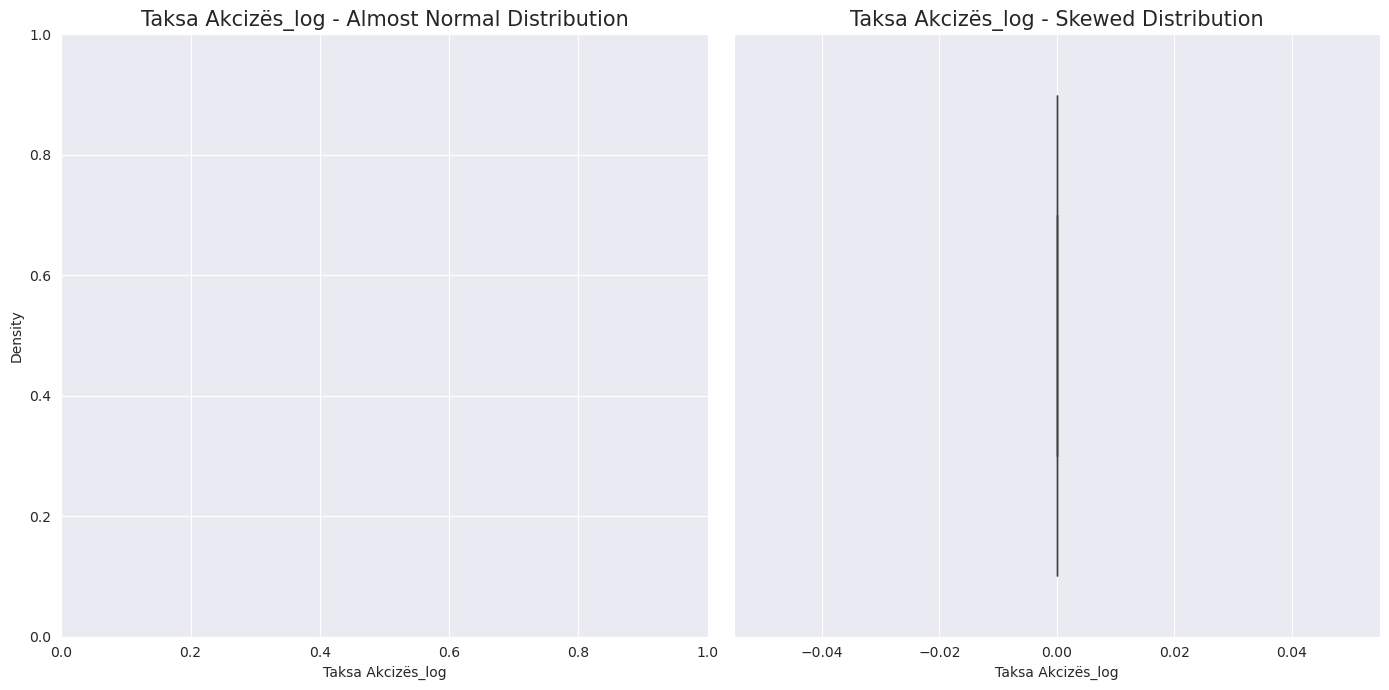

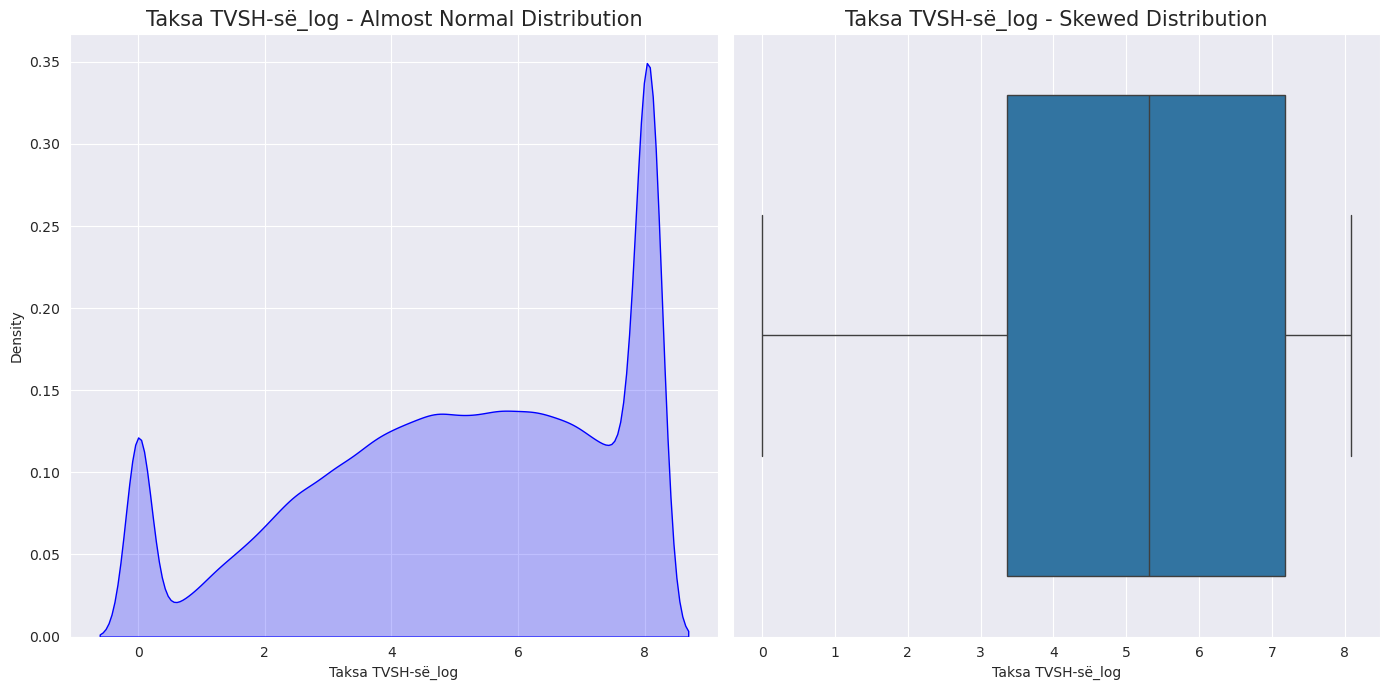

In [91]:
numeric_columns1 = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns1:
    plt.figure(figsize=(14, 7))

    # Subplot 1: Kernel Density Estimation Plot
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - Almost Normal Distribution", fontsize=15)
    sns.kdeplot(data=df[column], fill=True, color="blue", warn_singular=False)

    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2)
    plt.title(f"{column} - Skewed Distribution", fontsize=15)
    sns.boxplot(data=df[column], orient="h")

    plt.tight_layout()
    plt.show()

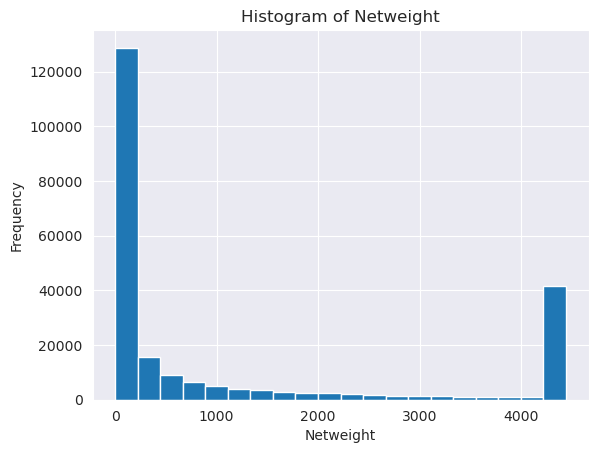

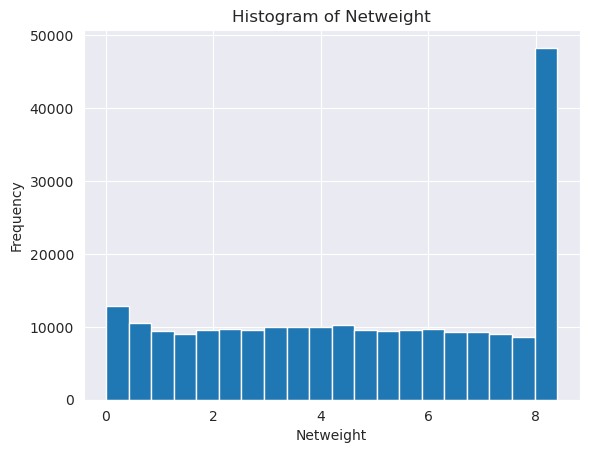

In [92]:
# Histogram for data distribution before cleaning
df['Netweight'].hist(bins=20)
plt.title('Histogram of Netweight')
plt.xlabel('Netweight')
plt.ylabel('Frequency')
plt.show()

# Histogram for data distribution after cleaning
df['Netweight_log'].hist(bins=20)
plt.title('Histogram of Netweight')
plt.xlabel('Netweight')
plt.ylabel('Frequency')
plt.show()

In [93]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
#
# train_data.to_csv('train_data.csv', index=False)
# test_data.to_csv('test_data.csv', index=False)

## Phase Two - Time Pattern Analysis
### Month of import prediction

Target: Muaji

Why?

> We uderstand seasonal import patterns,
> Inventory planning for businesses and
> Customs resource allocation

In [94]:
print(df)

        MUAJI                  Origjina Kodi Tarifor        Sasia  \
3           1            BG - BULLGARIA   8413703090    20.000000   
11          1                 CN - KINA   8504406090  2112.000000   
12          1       CZ - REPUBLIKA QEKE   8504406090     1.000000   
17          1             EC - EKUADORI   0603110000   240.000000   
18          1              NL - HOLANDA   0603197000  5285.082812   
...       ...                       ...          ...          ...   
233626     12  US - SHTETET E BASHKUARA   8543700100     1.078000   
233632     12               JP - JAPANI   9002900090    14.720000   
233633     12            DE - GJERMANIA   9002900090    66.140000   
233636     12                 CN - KINA   8529909100    17.822000   
233637     12              PL - POLONIA   8529909290    73.580000   

        Vlera Mallrave   Netweight  Taksa Doganës  Taksa Akcizës  \
3          4896.050000   295.00000        0.00000            0.0   
11        23824.450725  4442.24375 

In [95]:
df['Total_Tax'] = df['Taksa Doganës'] + df['Taksa Akcizës'] + df['Taksa TVSH-së']
df

,MUAJI,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së,Sasia_log,Vlera Mallrave_log,Netweight_log,Taksa Doganës_log,Taksa Akcizës_log,Taksa TVSH-së_log,Total_Tax
3,1,BG - BULLGARIA,8413703090,20.000000,4896.050000,295.00000,0.00000,0.0,0.00000,3.044522,8.496388,5.690359,0.000000,0.0,0.000000,0.0000
11,1,CN - KINA,8504406090,2112.000000,23824.450725,4442.24375,249.01875,0.0,3224.22375,7.655864,10.078510,8.399140,5.521536,0.0,8.078758,3473.2425
12,1,CZ - REPUBLIKA QEKE,8504406090,1.000000,146.850000,1.00000,14.69000,0.0,29.08000,0.693147,4.996198,0.693147,2.753024,0.0,3.403860,43.7700
17,1,EC - EKUADORI,0603110000,240.000000,197.340000,11.84000,19.73000,0.0,39.07000,5.484797,5.289983,2.552565,3.031582,0.0,3.690628,58.8000
18,1,NL - HOLANDA,0603197000,5285.082812,9193.170000,1423.24000,0.00000,0.0,1654.77000,8.572833,9.126325,7.261394,0.000000,0.0,7.412021,1654.7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233626,12,US - SHTETET E BASHKUARA,8543700100,1.078000,34.490000,0.39000,3.45000,0.0,6.83000,0.731406,3.569251,0.329304,1.492904,0.0,2.057963,10.2800
233632,12,JP - JAPANI,9002900090,14.720000,115.850000,0.50000,11.59000,0.0,22.94000,2.754934,4.760891,0.405465,2.532903,0.0,3.175551,34.5300
233633,12,DE - GJERMANIA,9002900090,66.140000,20.000000,1.00000,2.00000,0.0,3.96000,4.206780,3.044522,0.693147,1.098612,0.0,1.601406,5.9600
233636,12,CN - KINA,8529909100,17.822000,655.550000,8.39500,65.56000,0.0,129.80000,2.935026,6.486999,2.240178,4.198104,0.0,4.873669,195.3600


In [96]:
numerical_cols = ['Netweight', 'Vlera Mallrave', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së', 'Total_Tax']
skewness = df[numerical_cols].skew()

print("Skewness Scores:")
print(skewness)

Skewness Scores:
Netweight         1.200654
Vlera Mallrave    1.208138
Taksa Doganës     1.198969
Taksa Akcizës     0.000000
Taksa TVSH-së     1.206022
Total_Tax         1.168144
dtype: float64


In [97]:
df['Country_Code'] = df['Origjina'].str.split(' - ').str[0]
df['Country_Name'] = df['Origjina'].str.split(' - ').str[1]

In [98]:
df

,MUAJI,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së,Sasia_log,Vlera Mallrave_log,Netweight_log,Taksa Doganës_log,Taksa Akcizës_log,Taksa TVSH-së_log,Total_Tax,Country_Code,Country_Name
3,1,BG - BULLGARIA,8413703090,20.000000,4896.050000,295.00000,0.00000,0.0,0.00000,3.044522,8.496388,5.690359,0.000000,0.0,0.000000,0.0000,BG,BULLGARIA
11,1,CN - KINA,8504406090,2112.000000,23824.450725,4442.24375,249.01875,0.0,3224.22375,7.655864,10.078510,8.399140,5.521536,0.0,8.078758,3473.2425,CN,KINA
12,1,CZ - REPUBLIKA QEKE,8504406090,1.000000,146.850000,1.00000,14.69000,0.0,29.08000,0.693147,4.996198,0.693147,2.753024,0.0,3.403860,43.7700,CZ,REPUBLIKA QEKE
17,1,EC - EKUADORI,0603110000,240.000000,197.340000,11.84000,19.73000,0.0,39.07000,5.484797,5.289983,2.552565,3.031582,0.0,3.690628,58.8000,EC,EKUADORI
18,1,NL - HOLANDA,0603197000,5285.082812,9193.170000,1423.24000,0.00000,0.0,1654.77000,8.572833,9.126325,7.261394,0.000000,0.0,7.412021,1654.7700,NL,HOLANDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233626,12,US - SHTETET E BASHKUARA,8543700100,1.078000,34.490000,0.39000,3.45000,0.0,6.83000,0.731406,3.569251,0.329304,1.492904,0.0,2.057963,10.2800,US,SHTETET E BASHKUARA
233632,12,JP - JAPANI,9002900090,14.720000,115.850000,0.50000,11.59000,0.0,22.94000,2.754934,4.760891,0.405465,2.532903,0.0,3.175551,34.5300,JP,JAPANI
233633,12,DE - GJERMANIA,9002900090,66.140000,20.000000,1.00000,2.00000,0.0,3.96000,4.206780,3.044522,0.693147,1.098612,0.0,1.601406,5.9600,DE,GJERMANIA
233636,12,CN - KINA,8529909100,17.822000,655.550000,8.39500,65.56000,0.0,129.80000,2.935026,6.486999,2.240178,4.198104,0.0,4.873669,195.3600,CN,KINA


In [99]:
tax_by_country = df.groupby('Country_Code')['Total_Tax'].sum().sort_values(ascending=False)
print(tax_by_country.apply(lambda x: f"€{x:,.2f}"))  # Format as currency

Country_Code
CN    €37,772,304.87
TR    €28,894,286.12
DE    €19,693,782.91
IT    €15,316,361.00
PL     €7,878,863.53
           ...      
BT             €6.91
GF             €2.00
AS             €1.29
GY             €0.00
TG             €0.00
Name: Total_Tax, Length: 194, dtype: object


In [101]:
features = ['Netweight', 'Vlera Mallrave', 'Country_Code']  # Add more if needed
target = 'Total_Tax'

In [102]:
df_encoded = pd.get_dummies(df, columns=['Country_Code'])
X = df_encoded[['Netweight', 'Vlera Mallrave'] + list(df_encoded.filter(like='Country_Code_').columns)]
y = df_encoded['Total_Tax']

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 583.2921466050977
R² Score: 0.7720053655924162


In [107]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb.predict(X_test)

# Evaluate performance
print("XGBoost Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred)):.4f}")
print(f"R² Score: {r2_score(y_test, xgb_pred):.4f}")
print("\n")

XGBoost Performance:
RMSE: 531.2720
R² Score: 0.8109




In [ ]:
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# 
# # Scale features for SVR
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# svr.fit(X_train_scaled, y_train)
# y_pred_svr = svr.predict(X_test_scaled)
# 
# print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
# print("SVR R²:", r2_score(y_test, y_pred_svr))


In [ ]:
# from lightgbm import LGBMRegressor